<h1 style="padding:15px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:300%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Body signal of smoking Analysis & Prediction
</h1>

<p style="text-align:center; margin-top: 20px;">
    <img src="https://i-cf65.ch-static.com/content/dam/cf-consumer-healthcare/paradontax/es_AR/assets/about-gum-disease/2.2.2_Causes_Smoking.jpg?auto=format" style='width: 300px; height: 300px; border: 1px solid #ddd;'>
</p>

<p style="text-align:justify; ">

Smoking is the act of inhaling and exhaling the smoke produced by burning tobacco. Tobacco smoke contains thousands of harmful chemicals, many of which are toxic and addictive. Smoking affects nearly every organ in the human body and is one of the leading causes of preventable diseases and deaths worldwide.<br>
<br>
People who smoke are at a significantly higher risk of developing serious health problems, including heart disease, stroke, respiratory illnesses, and various types of cancer. Although quitting smoking can be challenging, stopping at any age greatly reduces health risks. Over time, the body begins to heal, improving lung function, circulation, and overall quality of life.

</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px; margin:0; font-family:serif; font-size:130%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:500">Table Of Contents</p>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Correlation Analysis](#6) |
| 2 | [Dataset Overview](#2) | 7 | [Data Preprocessing](#7) |
| 3 | [Exploratory Data Analysis (EDA)](#3) | 8 | [Model Training](#8) |
| 4 | [Feature Visualization](#4) | 9 | [Performance Evaluation](#9) |
| 5 | [Feature Engineering](#5) | 10 | [Conclusions & Closing](#10) |

</div>
</div>

<div style="margin-top: 30px; padding: 15px; border: 1.5px solid #000000; border-radius: 20px; background-color: #ffffff; font-family: serif; color: #000000; text-align: center;">
    The dataset was shared by following link: 
    <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data" style="color: #000000; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</div>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Importing Libraries
</p>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
# To show all columns
pd.set_option('display.max_columns', 15)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dataset Overview
</p>

In [145]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [146]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


In [147]:
df = df.drop("ID", axis = 1)

df.rename(columns = {
    "height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
"Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
"AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
inplace = True)

In [148]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ld

In [149]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [150]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [151]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Cleaning
</p>

In [152]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {df.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {df.shape[0]} entries in this dataset.")

There are 11140 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 44552 entries in this dataset.


In [153]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})

In [154]:
df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2) 
df["avg_eyesight"] = (df["eyesight_left"]+df["eyesight_right"])/2 
df["hdl_to_ldl"] = df["hdl"]/df["ldl"] 

df = df.drop(["weight_kg","height_cm","eyesight_left","eyesight_right","hearing_right","hearing_left","hdl","ldl","oral"], axis = 1)

print(df.dtypes)

gender                  object
age                      int64
waist_cm               float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries           object
tartar                  object
smoking                 object
bmi                    float64
avg_eyesight           float64
hdl_to_ldl             float64
dtype: object



<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Table of Variables
</p>

<br>

<div align="center">

| Variable            | Type            | Description                               | Values / Units  |
| :------------------ | :-------------- | :---------------------------------------- | :-------------- |
| gender              | Categorical     | Biological sex                            | Male / Female   |
| age                 | Numerical       | Age                                       | Years           |
| height              | Numerical       | body mass index = weight  / height^2      | kg / cm^2       |
| weight              | Numerical       | Weight                                    | kg              |
| waist               | Numerical       | Waist circumference                       | cm              |
| avg_eyesight        | Numerical       | Average of Right and Left eyesight        | Diopters        |
| relaxation          | Numerical       | Diastolic blood pressure                  | mmHg            |
| fasting_blood_sugar | Numerical       | Fasting blood sugar                       | mg/dL           |
| cholesterol         | Numerical       | Total cholesterol                         | mg/dL           |
| triglyceride        | Numerical       | Triglycerides                             | mg/dL           |
| HDL to LDL          | Numerical       | ratio of good cholesterol                 | mg/dL           |
| hemoglobin          | Numerical       | Hemoglobin level                          | g/dL            |
| Urine protein       | Ordinal         | Urine protein level                       | 1–5             |
| serum creatinine    | Numerical       | Kidney function indicator                 | mg/dL           |
| AST                 | Numerical       | Aspartate aminotransferase (liver enzyme) | U/L             |
| ALT                 | Numerical       | Alanine aminotransferase (liver enzyme)   | U/L             |
| gtp                 | Numerical       | Gamma-glutamyl transferase (liver enzyme) | U/L             |
| dental_caries       | Binary          | Presence of dental caries                 | 0 = No, 1 = Yes |
| tartar              | Binary          | Presence of dental tartar                 | 0 = No, 1 = Yes |
| smoking             | Target (Binary) | Smoking status                            | 0 = No, 1 = Yes |                  
</div>
</div>






<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Settings for Visualizations
</p>

In [155]:
colors_palette = {
    "coral": "#e15759",
    "steel_blue": "#4e79a7",
    "orange": "#f28e2b",
    "muted_teal": "#76b7b2",
    "sage_green": "#59a14f"
}

In [156]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = df.select_dtypes(include="object").columns.tolist()

In [157]:
def remove_outliers_iqr(df, numeric_cols):
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) &
            (df_clean[col] <= upper)
        ]
    print("Original shapes:\n")
    print(df.shape)

    print("Without outliers:\n")
    print(df_clean.shape)

    return df_clean


In [158]:
def plot_histogram(columns, df, bins=20):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.hist(
            data,
            bins=bins,
            alpha=0.7,
            color=colors_palette["steel_blue"],
            edgecolor="white"
        )

        ax.axvline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [159]:
def plot_boxplot(columns, df):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.boxplot(
            data,
            vert=True,
            widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor=colors_palette["steel_blue"], edgecolor="white"),
            medianprops=dict(color="black", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", markersize=4, markerfacecolor="gray", alpha=0.6)
        )

        ax.axhline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(col)
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [ ]:
def plot_binary_pie_charts(columns, df):
    n_vars = len(columns)
    n_cols = 2
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        counts = df[col].value_counts().sort_index()

        labels = counts.index.astype(str)
        values = counts.values

        colors = [
            colors_palette["steel_blue"],
            colors_palette["coral"]
        ]

        wedges, texts, autotexts = ax.pie(
            values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=90,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(size=14, color="white"),
            wedgeprops=dict(
                width=0.45,
                edgecolor="white",
                linewidth=4
            )
        )

        ax.set_title(f"\n{col}", fontsize=18)
        ax.legend(
            wedges,
            labels,
            title="Class",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

In [161]:
def plot_comparison_histogram_style(columns, group0,label0, group1,label1):
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data_0 = group0[col].dropna()
        data_1 = group1[col].dropna()

        mean_0 = data_0.mean()
        mean_1 = data_1.mean()


        ax.hist(
            data_0, bins=20, alpha=0.6,
            color = colors_palette["steel_blue"], edgecolor="white",
            label=label0
        )

        ax.hist(
            data_1, bins=20, alpha=0.6,
            color = colors_palette["coral"], edgecolor="white",
            label = label1
        )


        ax.axvline(mean_0, color = colors_palette["steel_blue"], linestyle="--", linewidth=2)
        ax.axvline(mean_1, color = colors_palette["coral"], linestyle="--", linewidth=2)

        ax.set_title(col, fontsize=14)
        ax.set_ylabel("Frequency")
        ax.legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Visualization
</p>

 **Distribution of Numerical and Categorical Features**

In [162]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (44552, 20)
Glimpse of The Dataset :


In [163]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

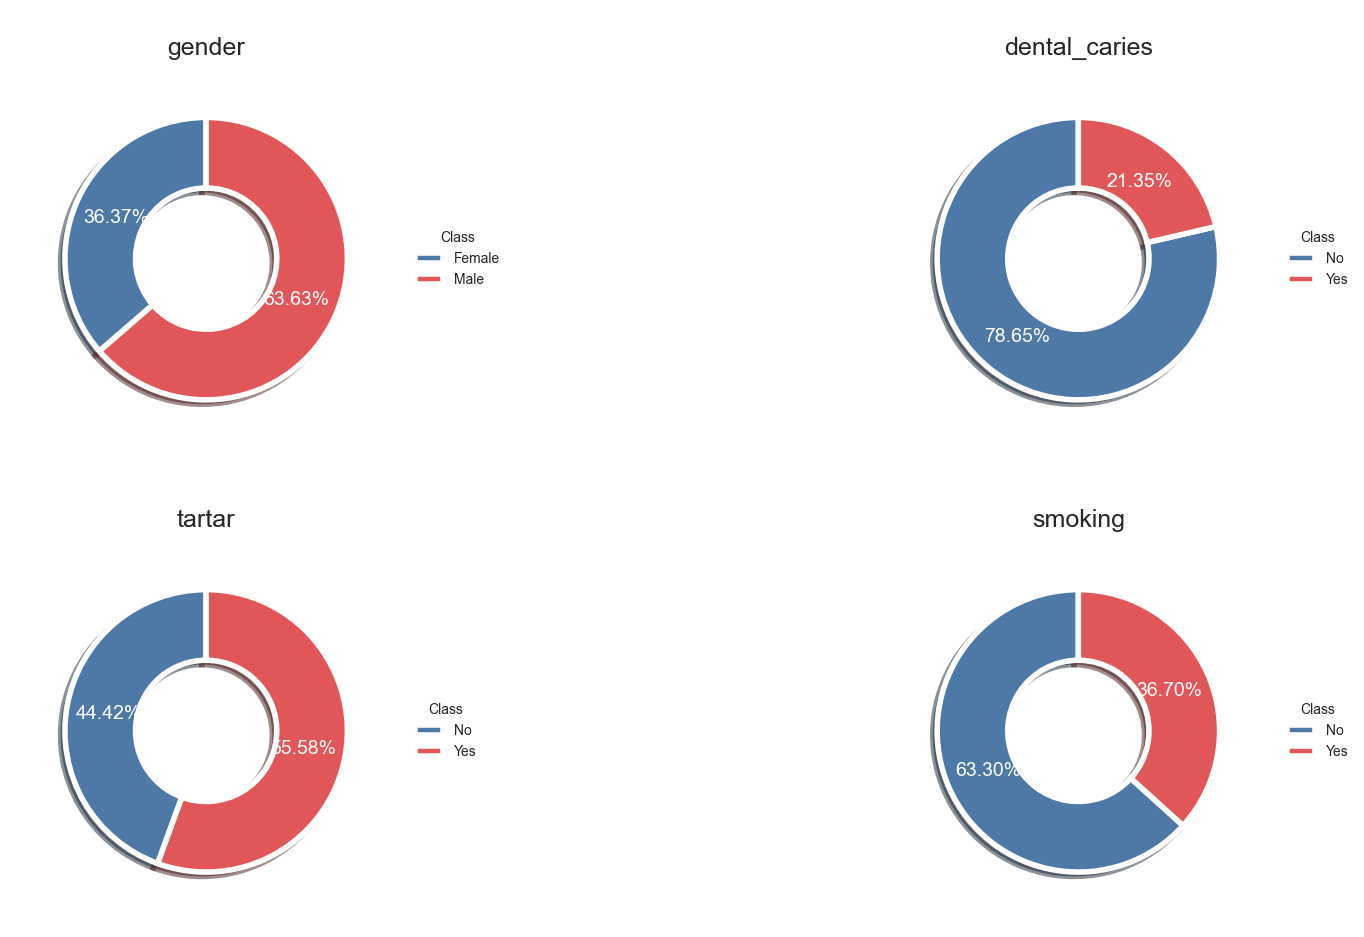

In [164]:
plot_binary_pie_charts(cat_columns, df)

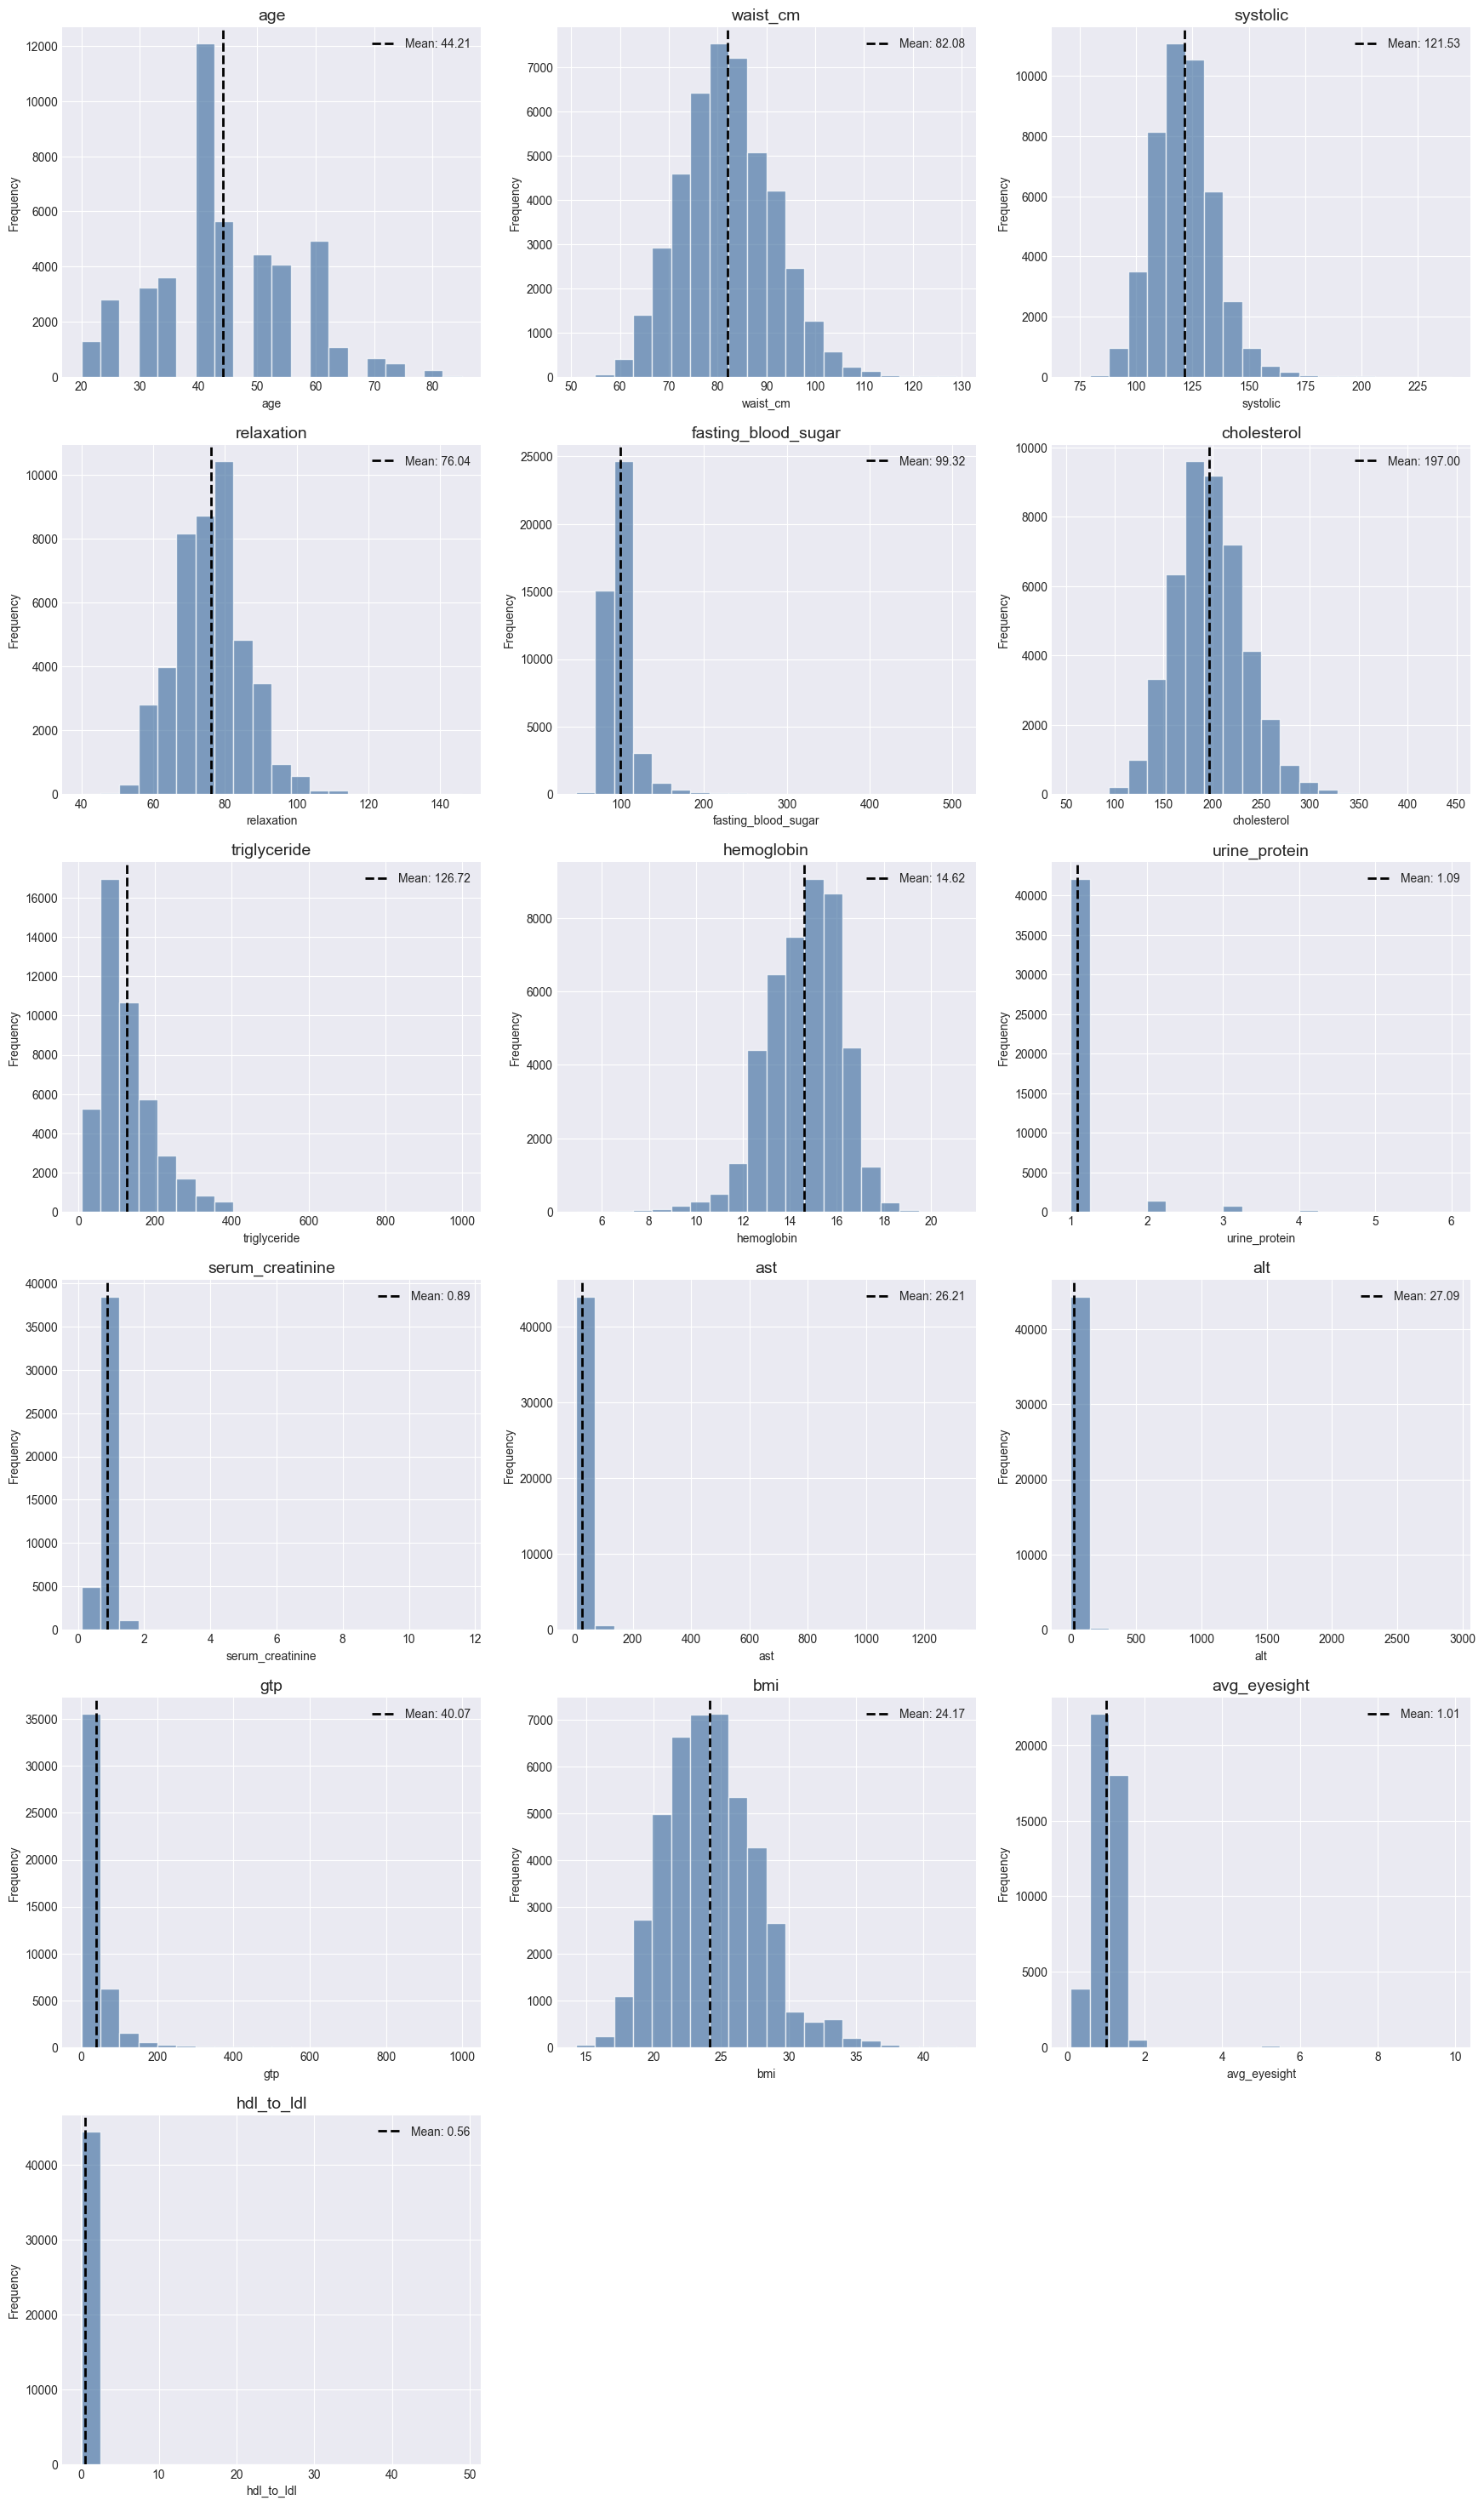

In [165]:
plot_histogram(numeric_cols, df)

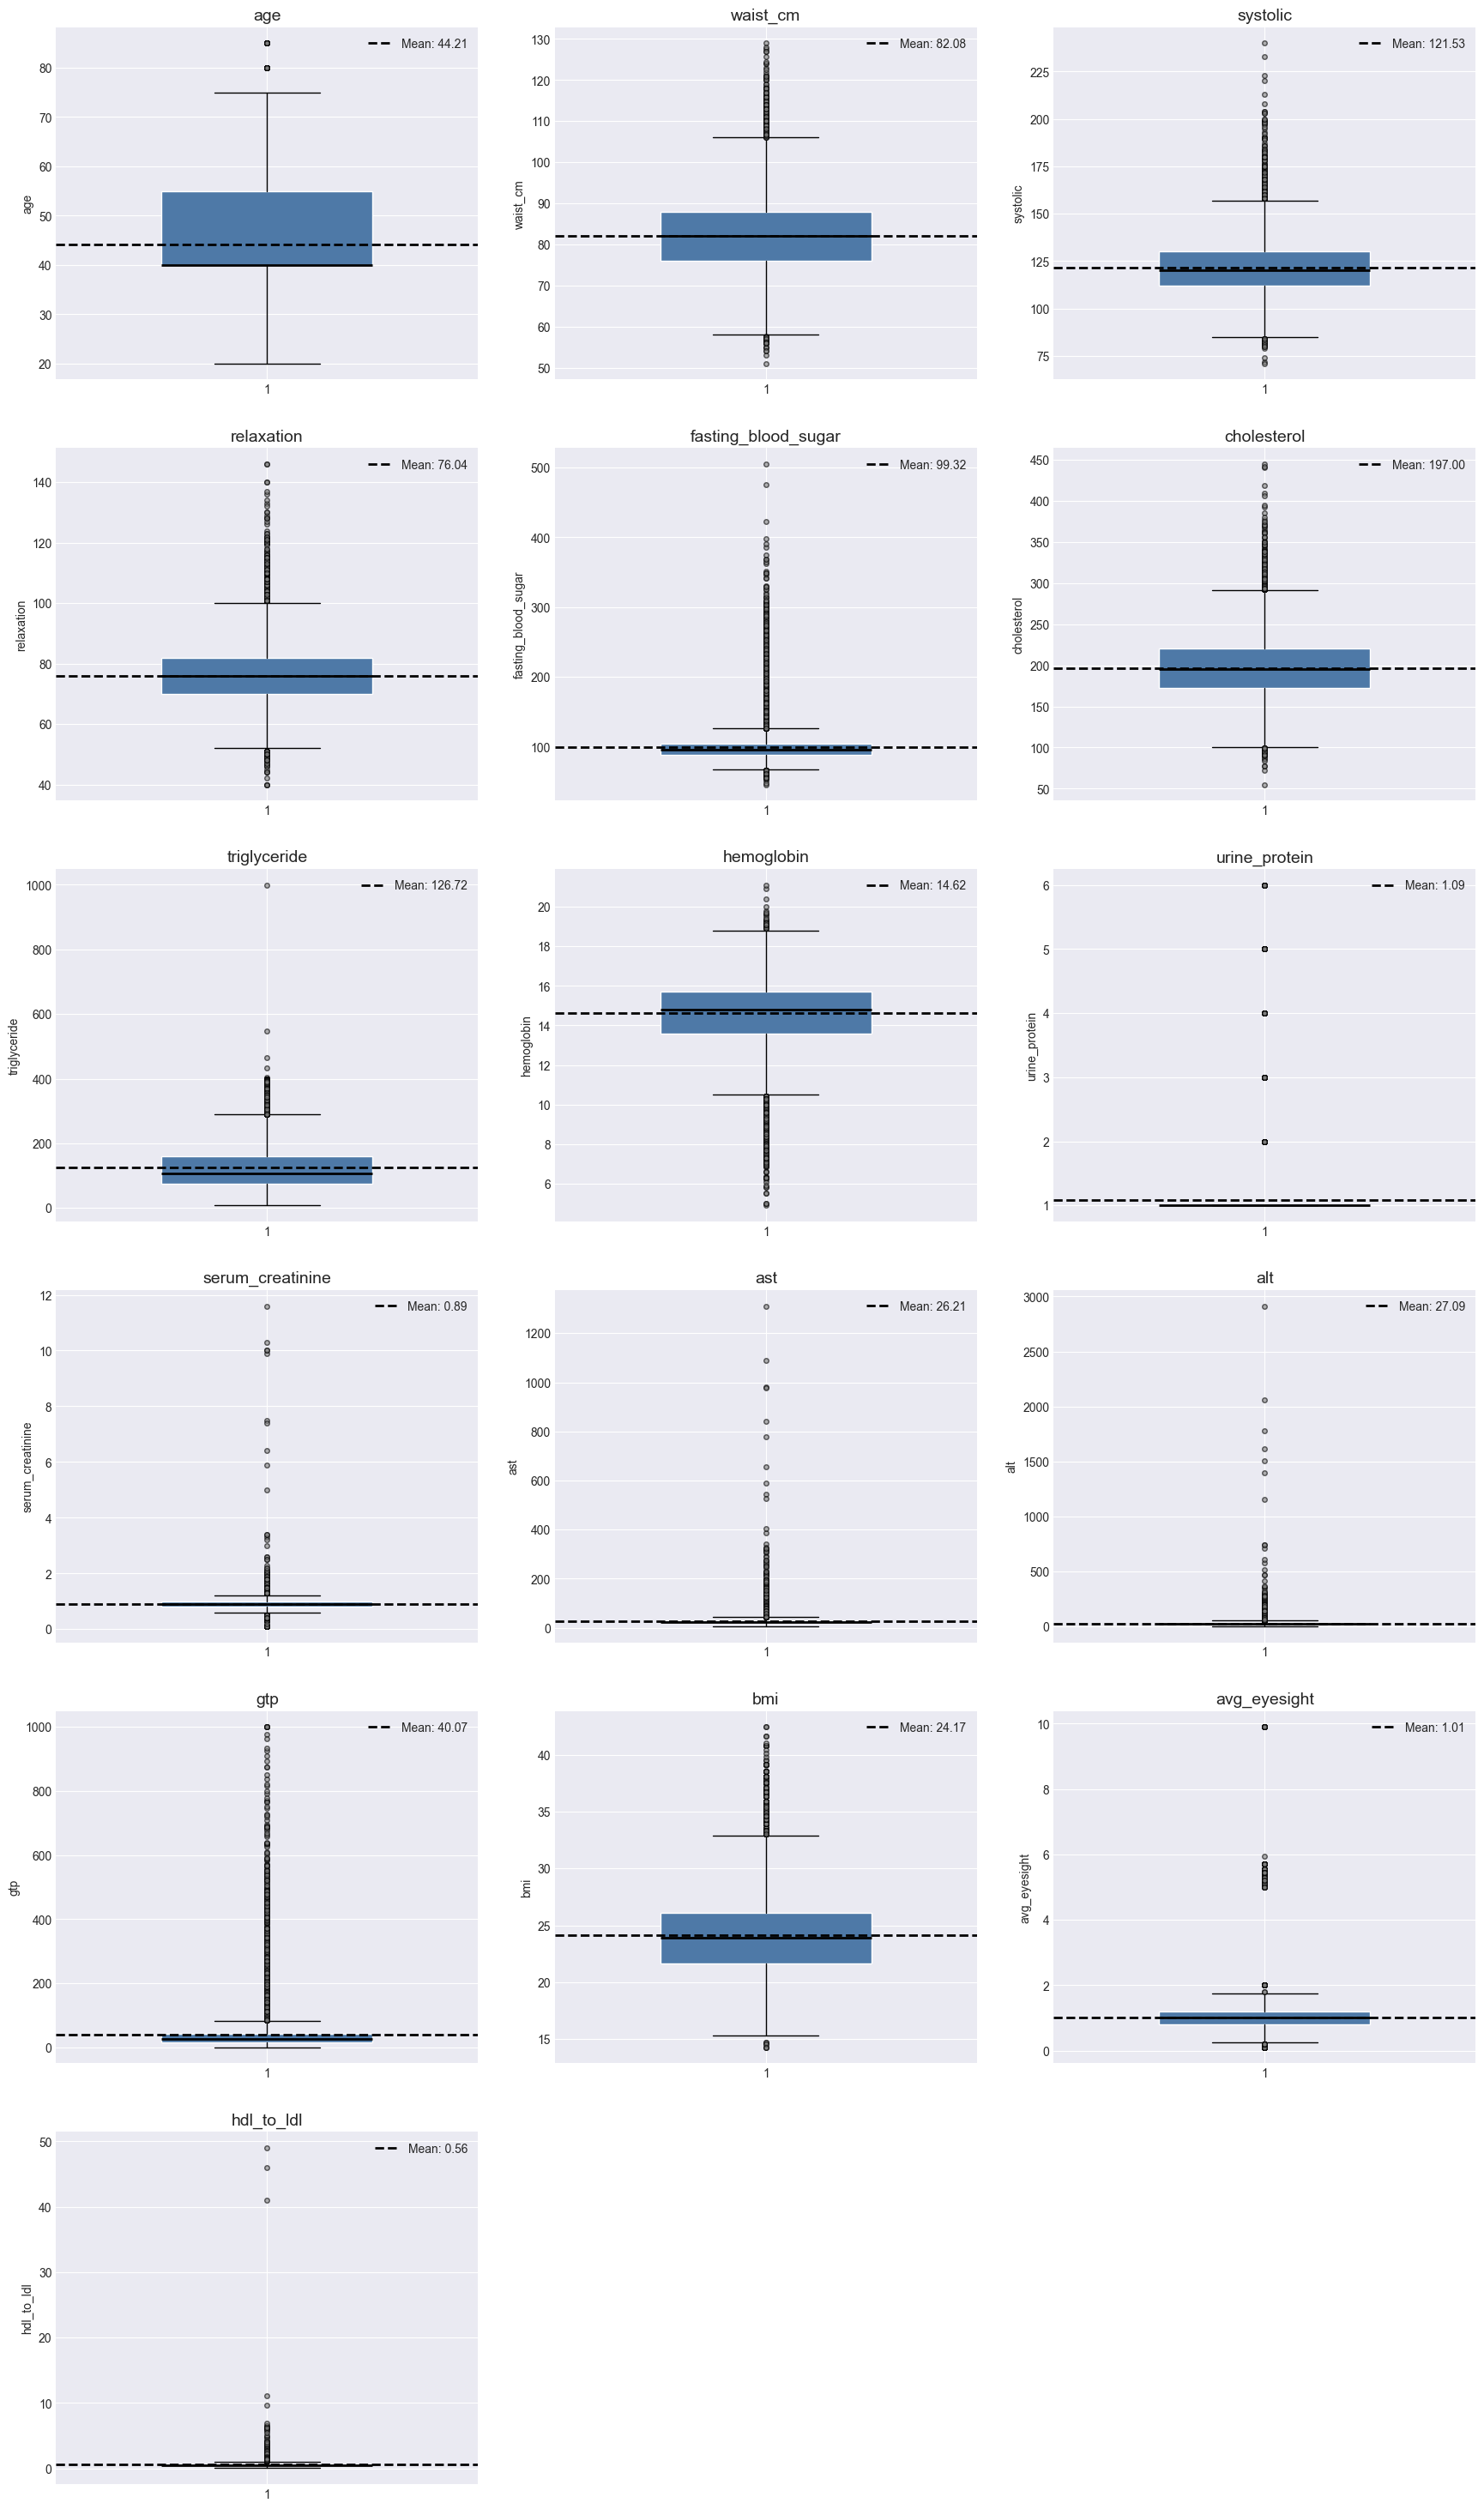

In [166]:
plot_boxplot(numeric_cols, df)

Original shapes:

(44552, 20)
Without outliers:

(26101, 20)


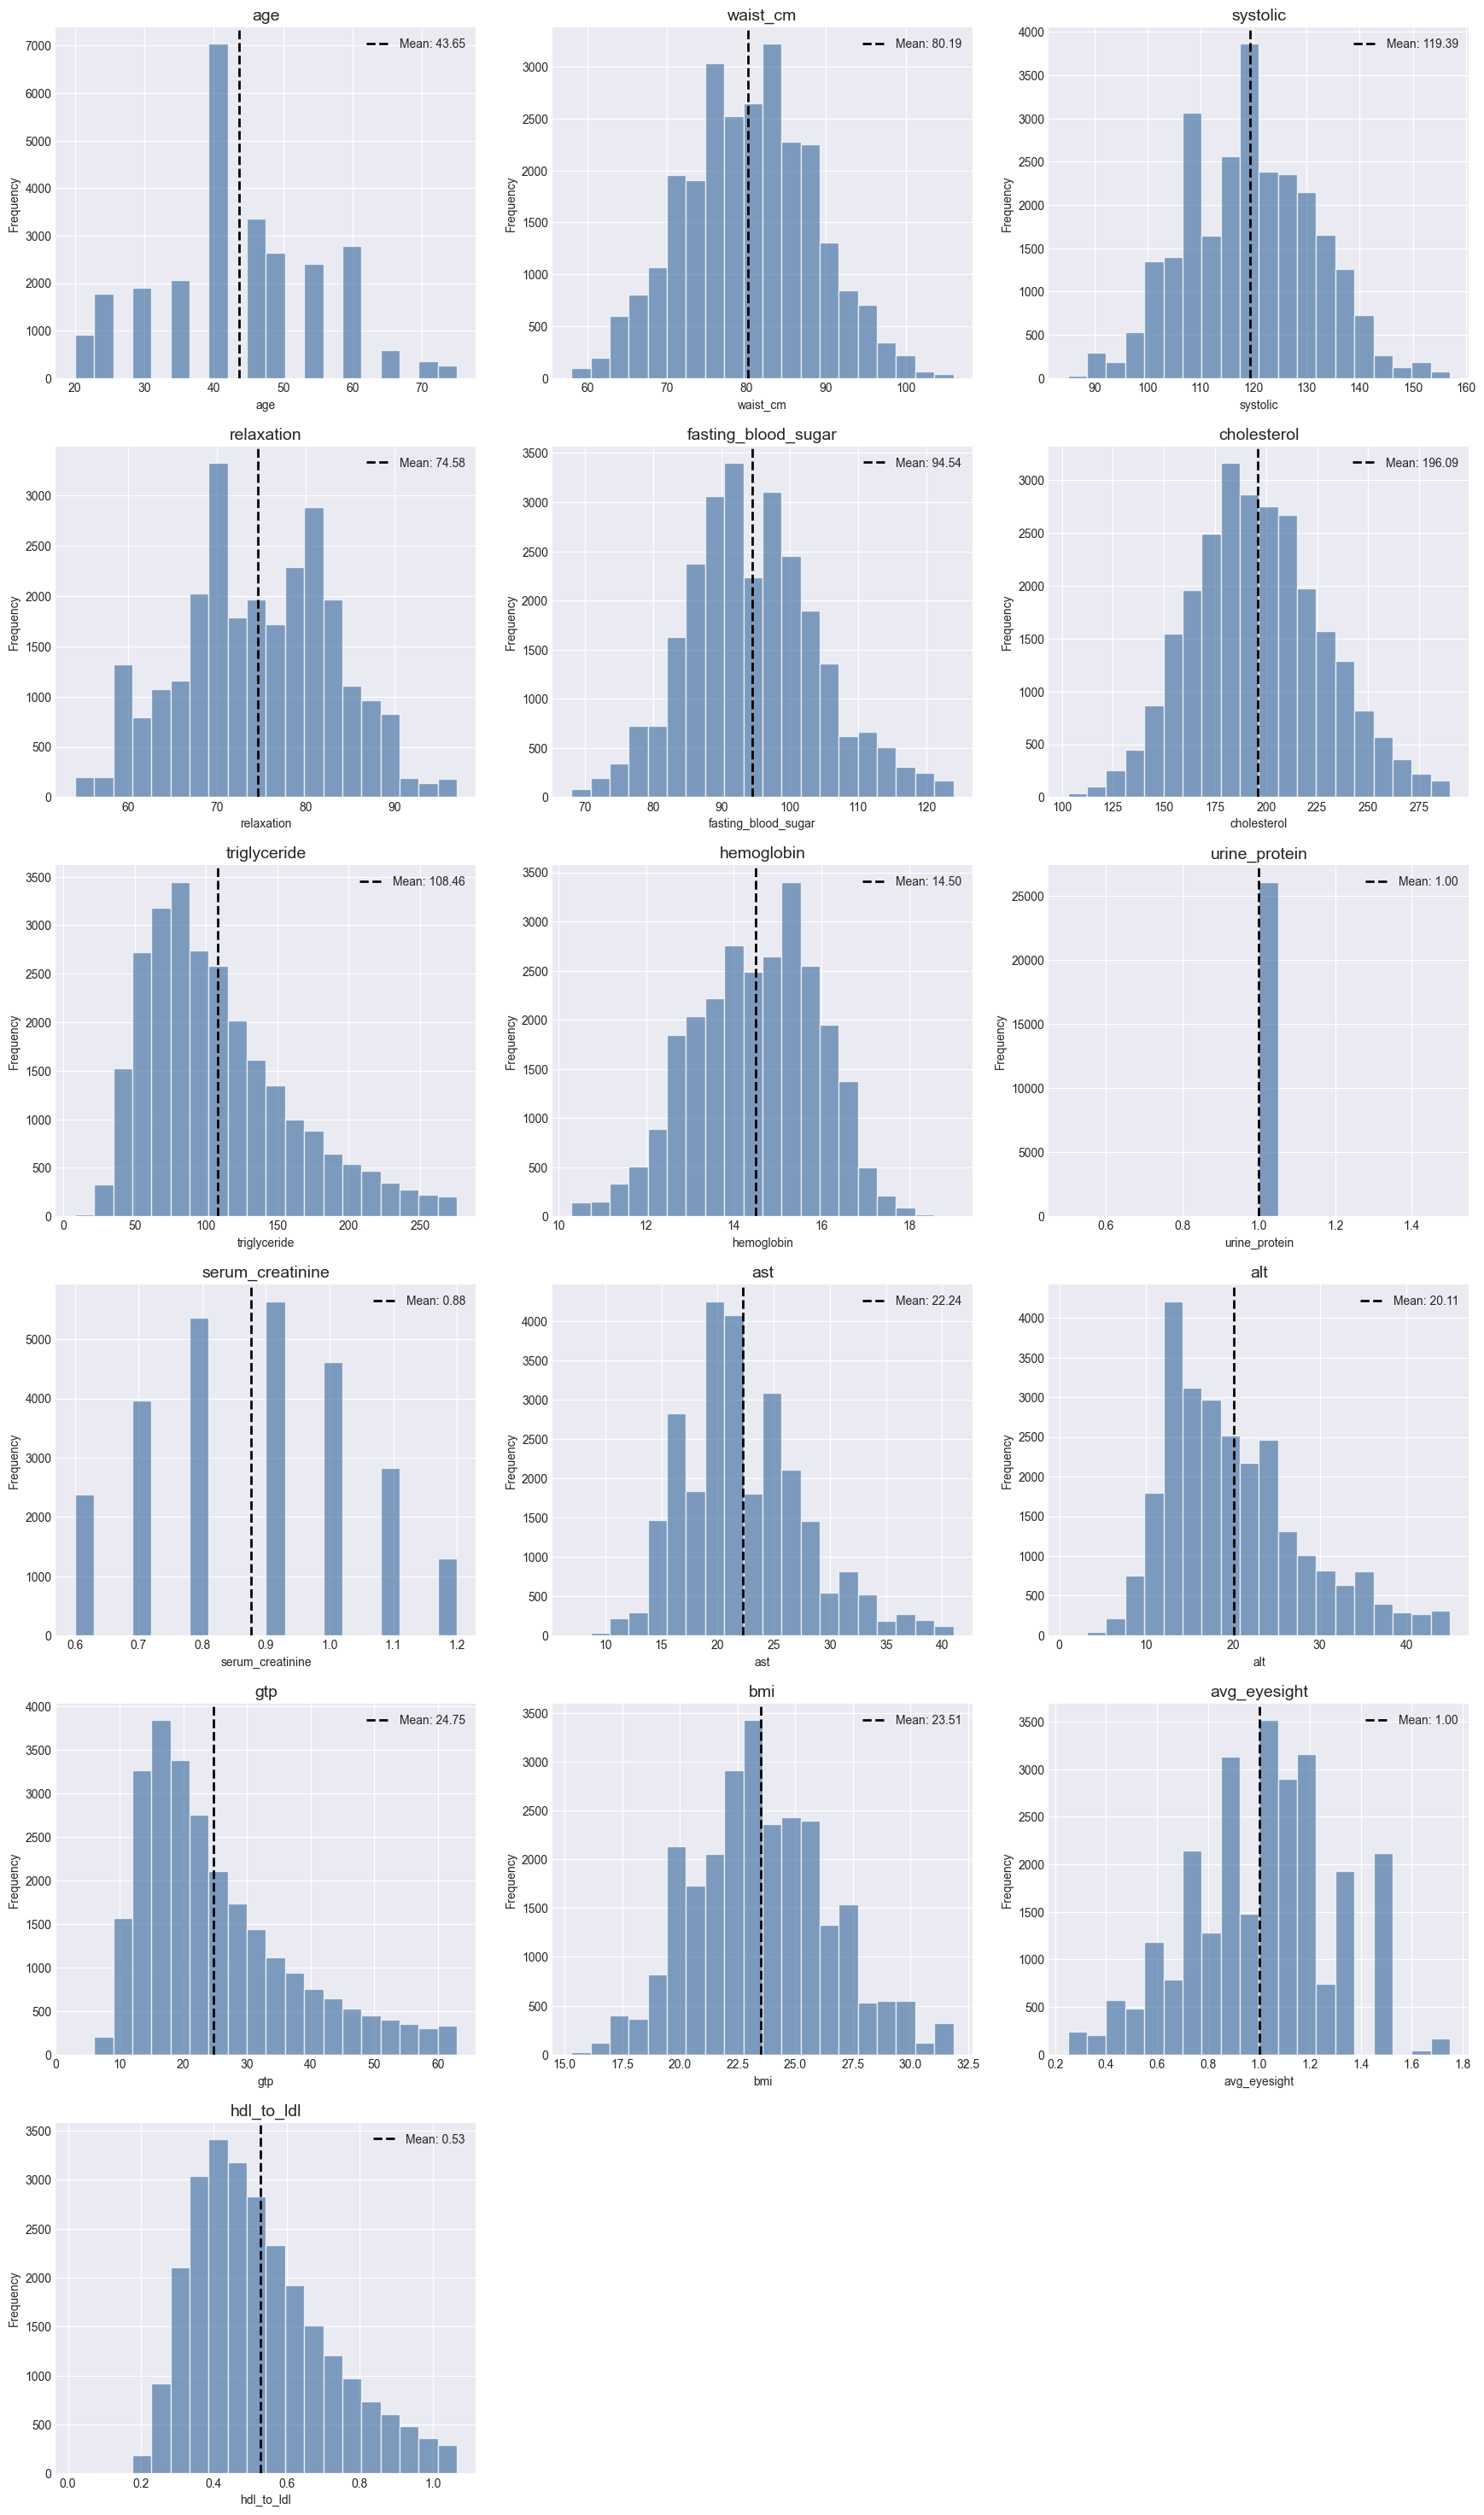

In [167]:
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

plot_histogram(numeric_cols, df_no_outliers)

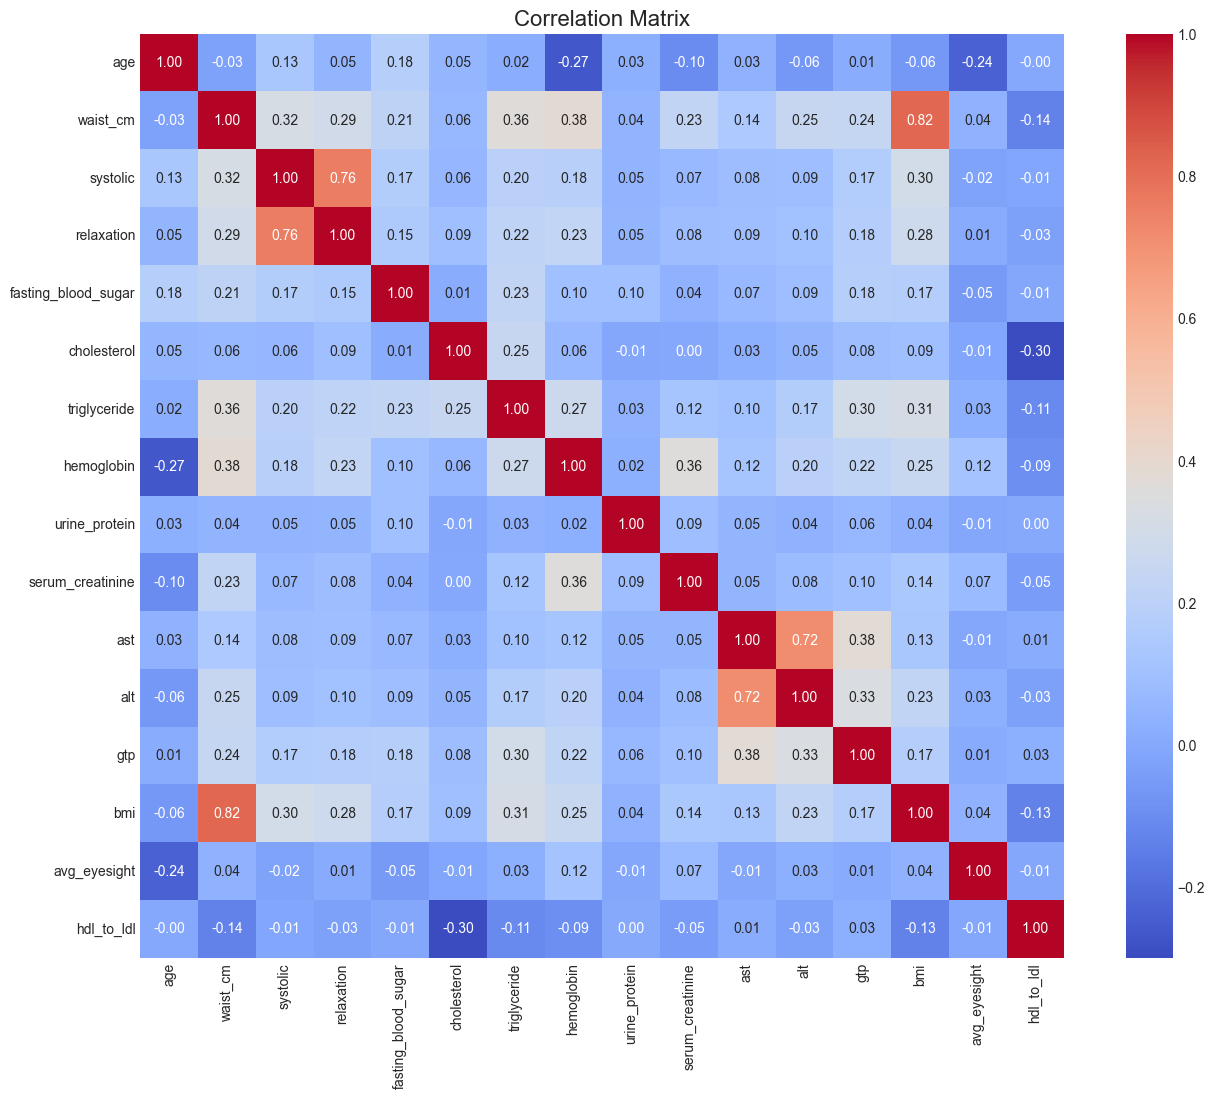

In [168]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Group-Based Analysis
</p>

**Smoking-Based Analysis (Non-Smoker vs Smoker)**

In [169]:
smoking_0 = df[df["smoking"] == "No"]
smoking_1 = df[df["smoking"] == "Yes"]


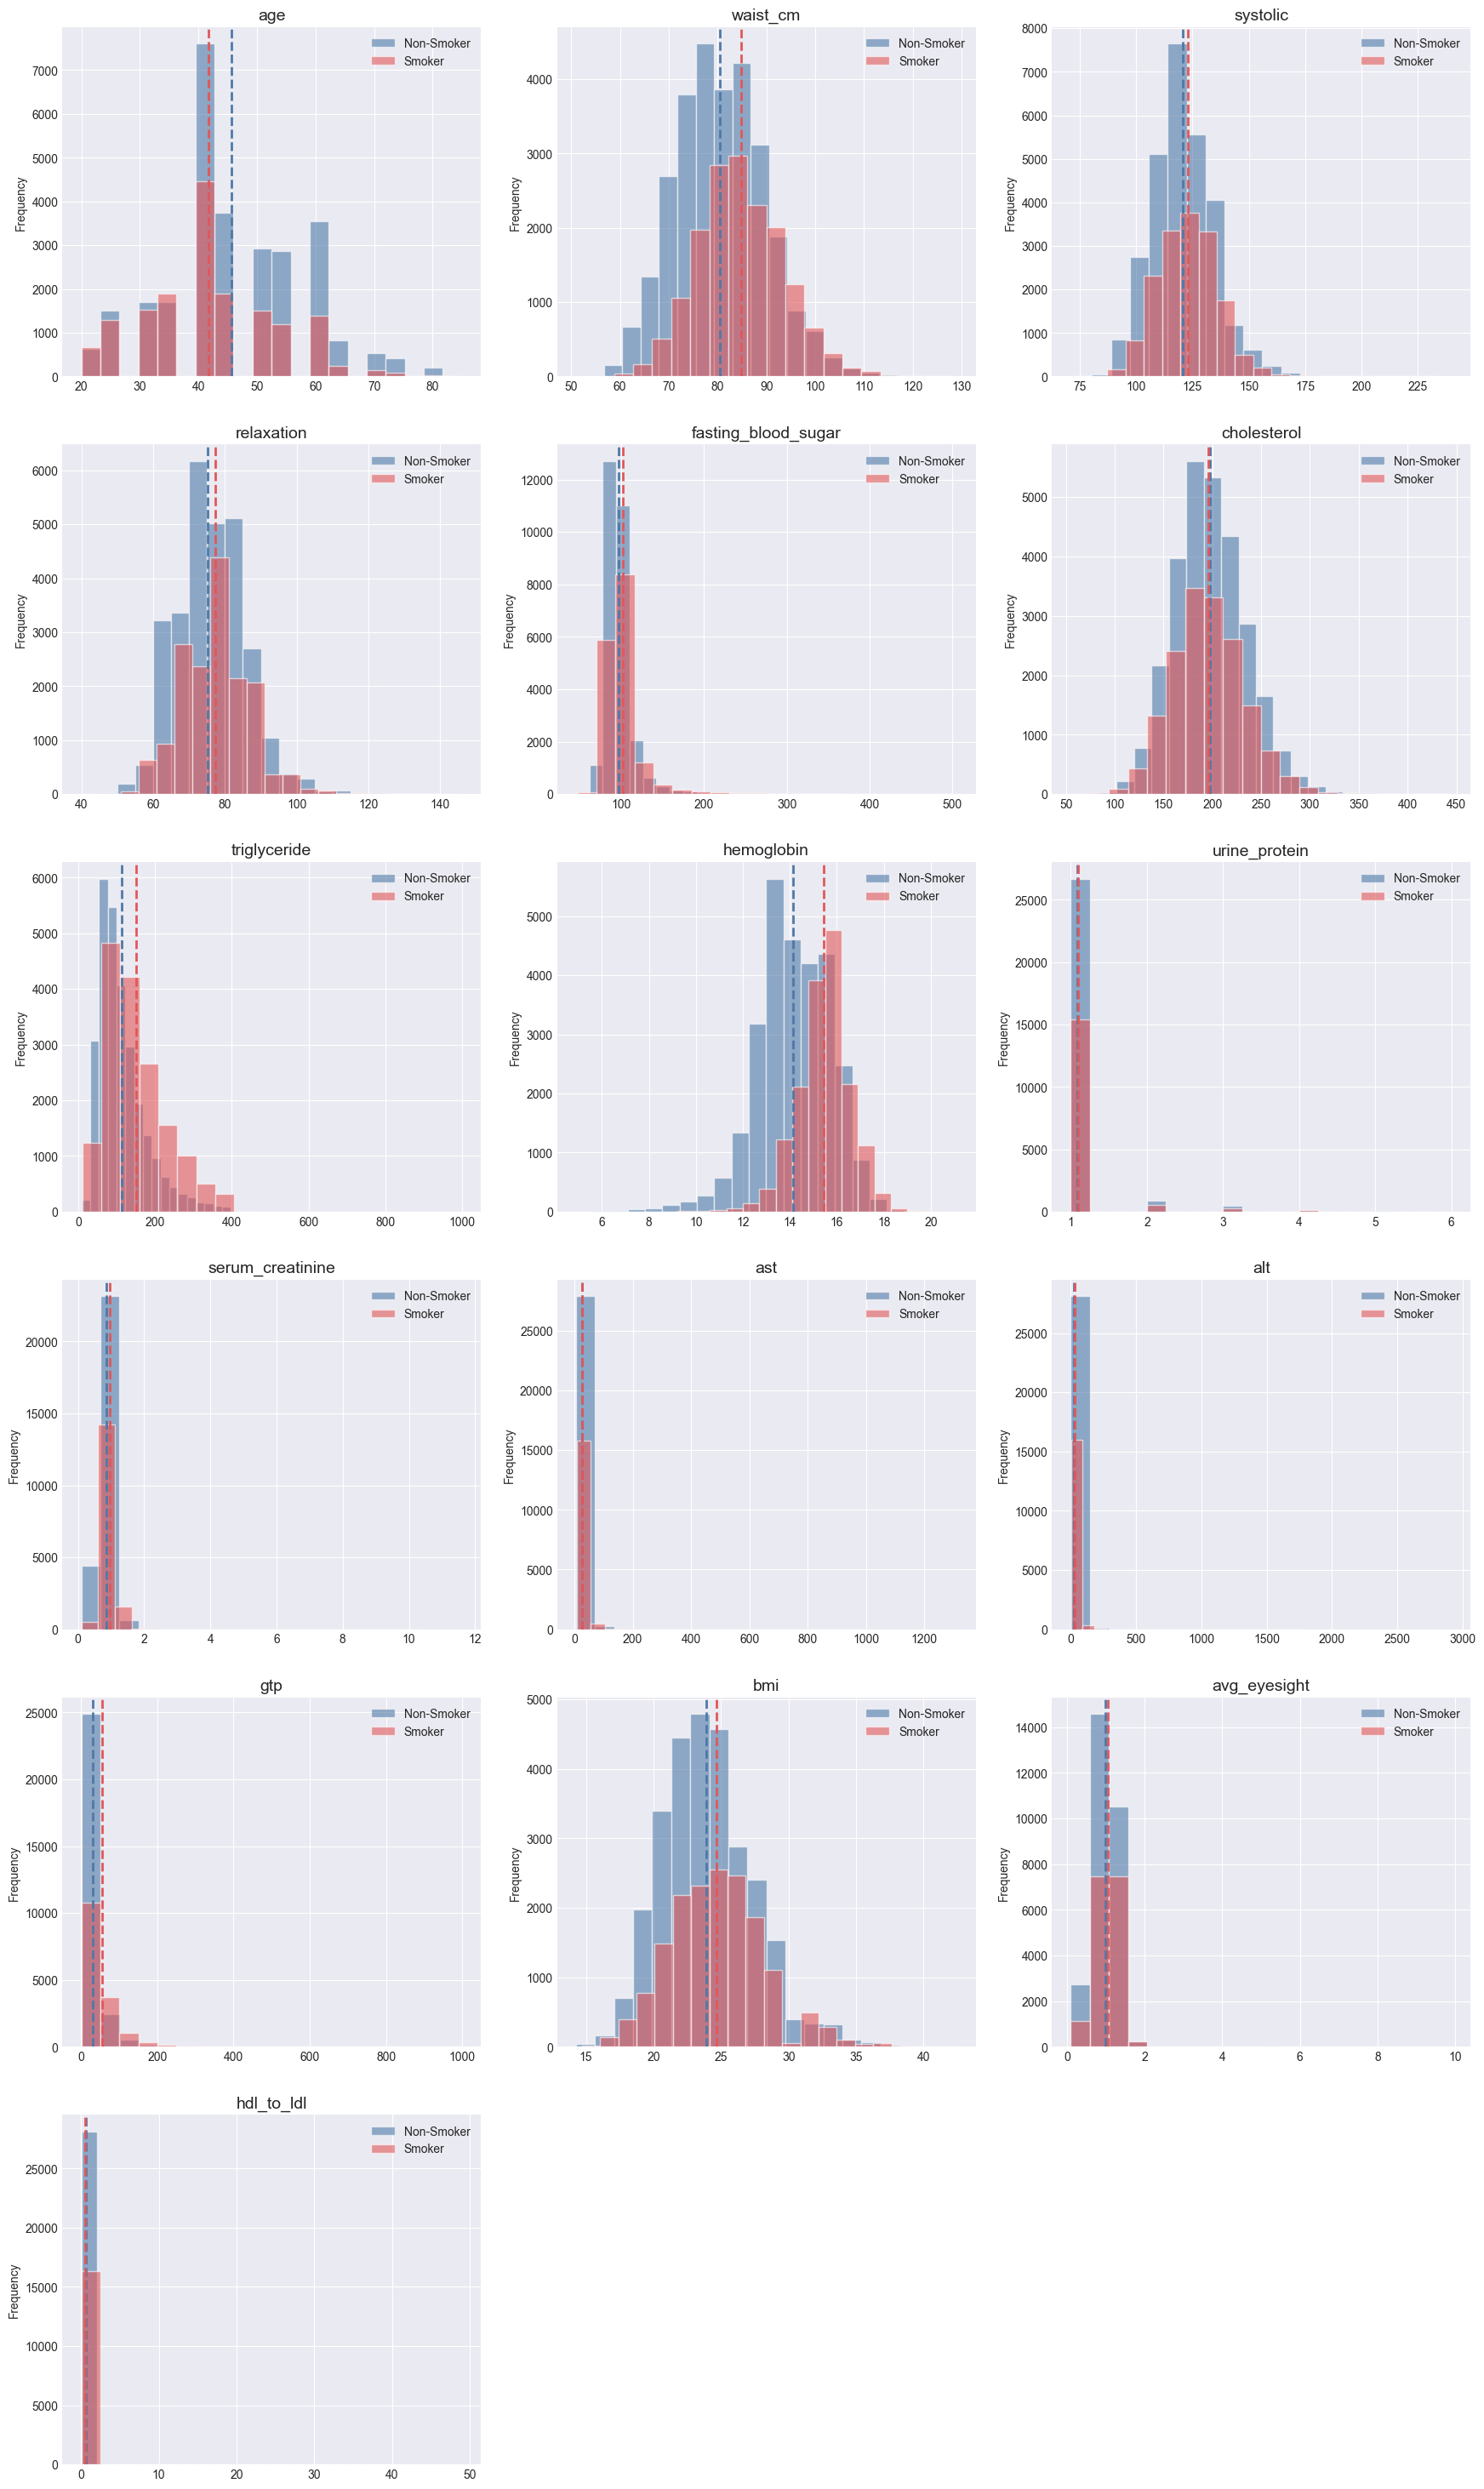

In [170]:
plot_comparison_histogram_style(numeric_cols, smoking_0, "Non-Smoker", smoking_1,"Smoker")

In [171]:
smoking_0_no_out = remove_outliers_iqr(smoking_0, numeric_cols)
smoking_1_no_out = remove_outliers_iqr(smoking_1, numeric_cols)

Original shapes:

(28200, 20)
Without outliers:

(17632, 20)
Original shapes:

(16352, 20)
Without outliers:

(9868, 20)


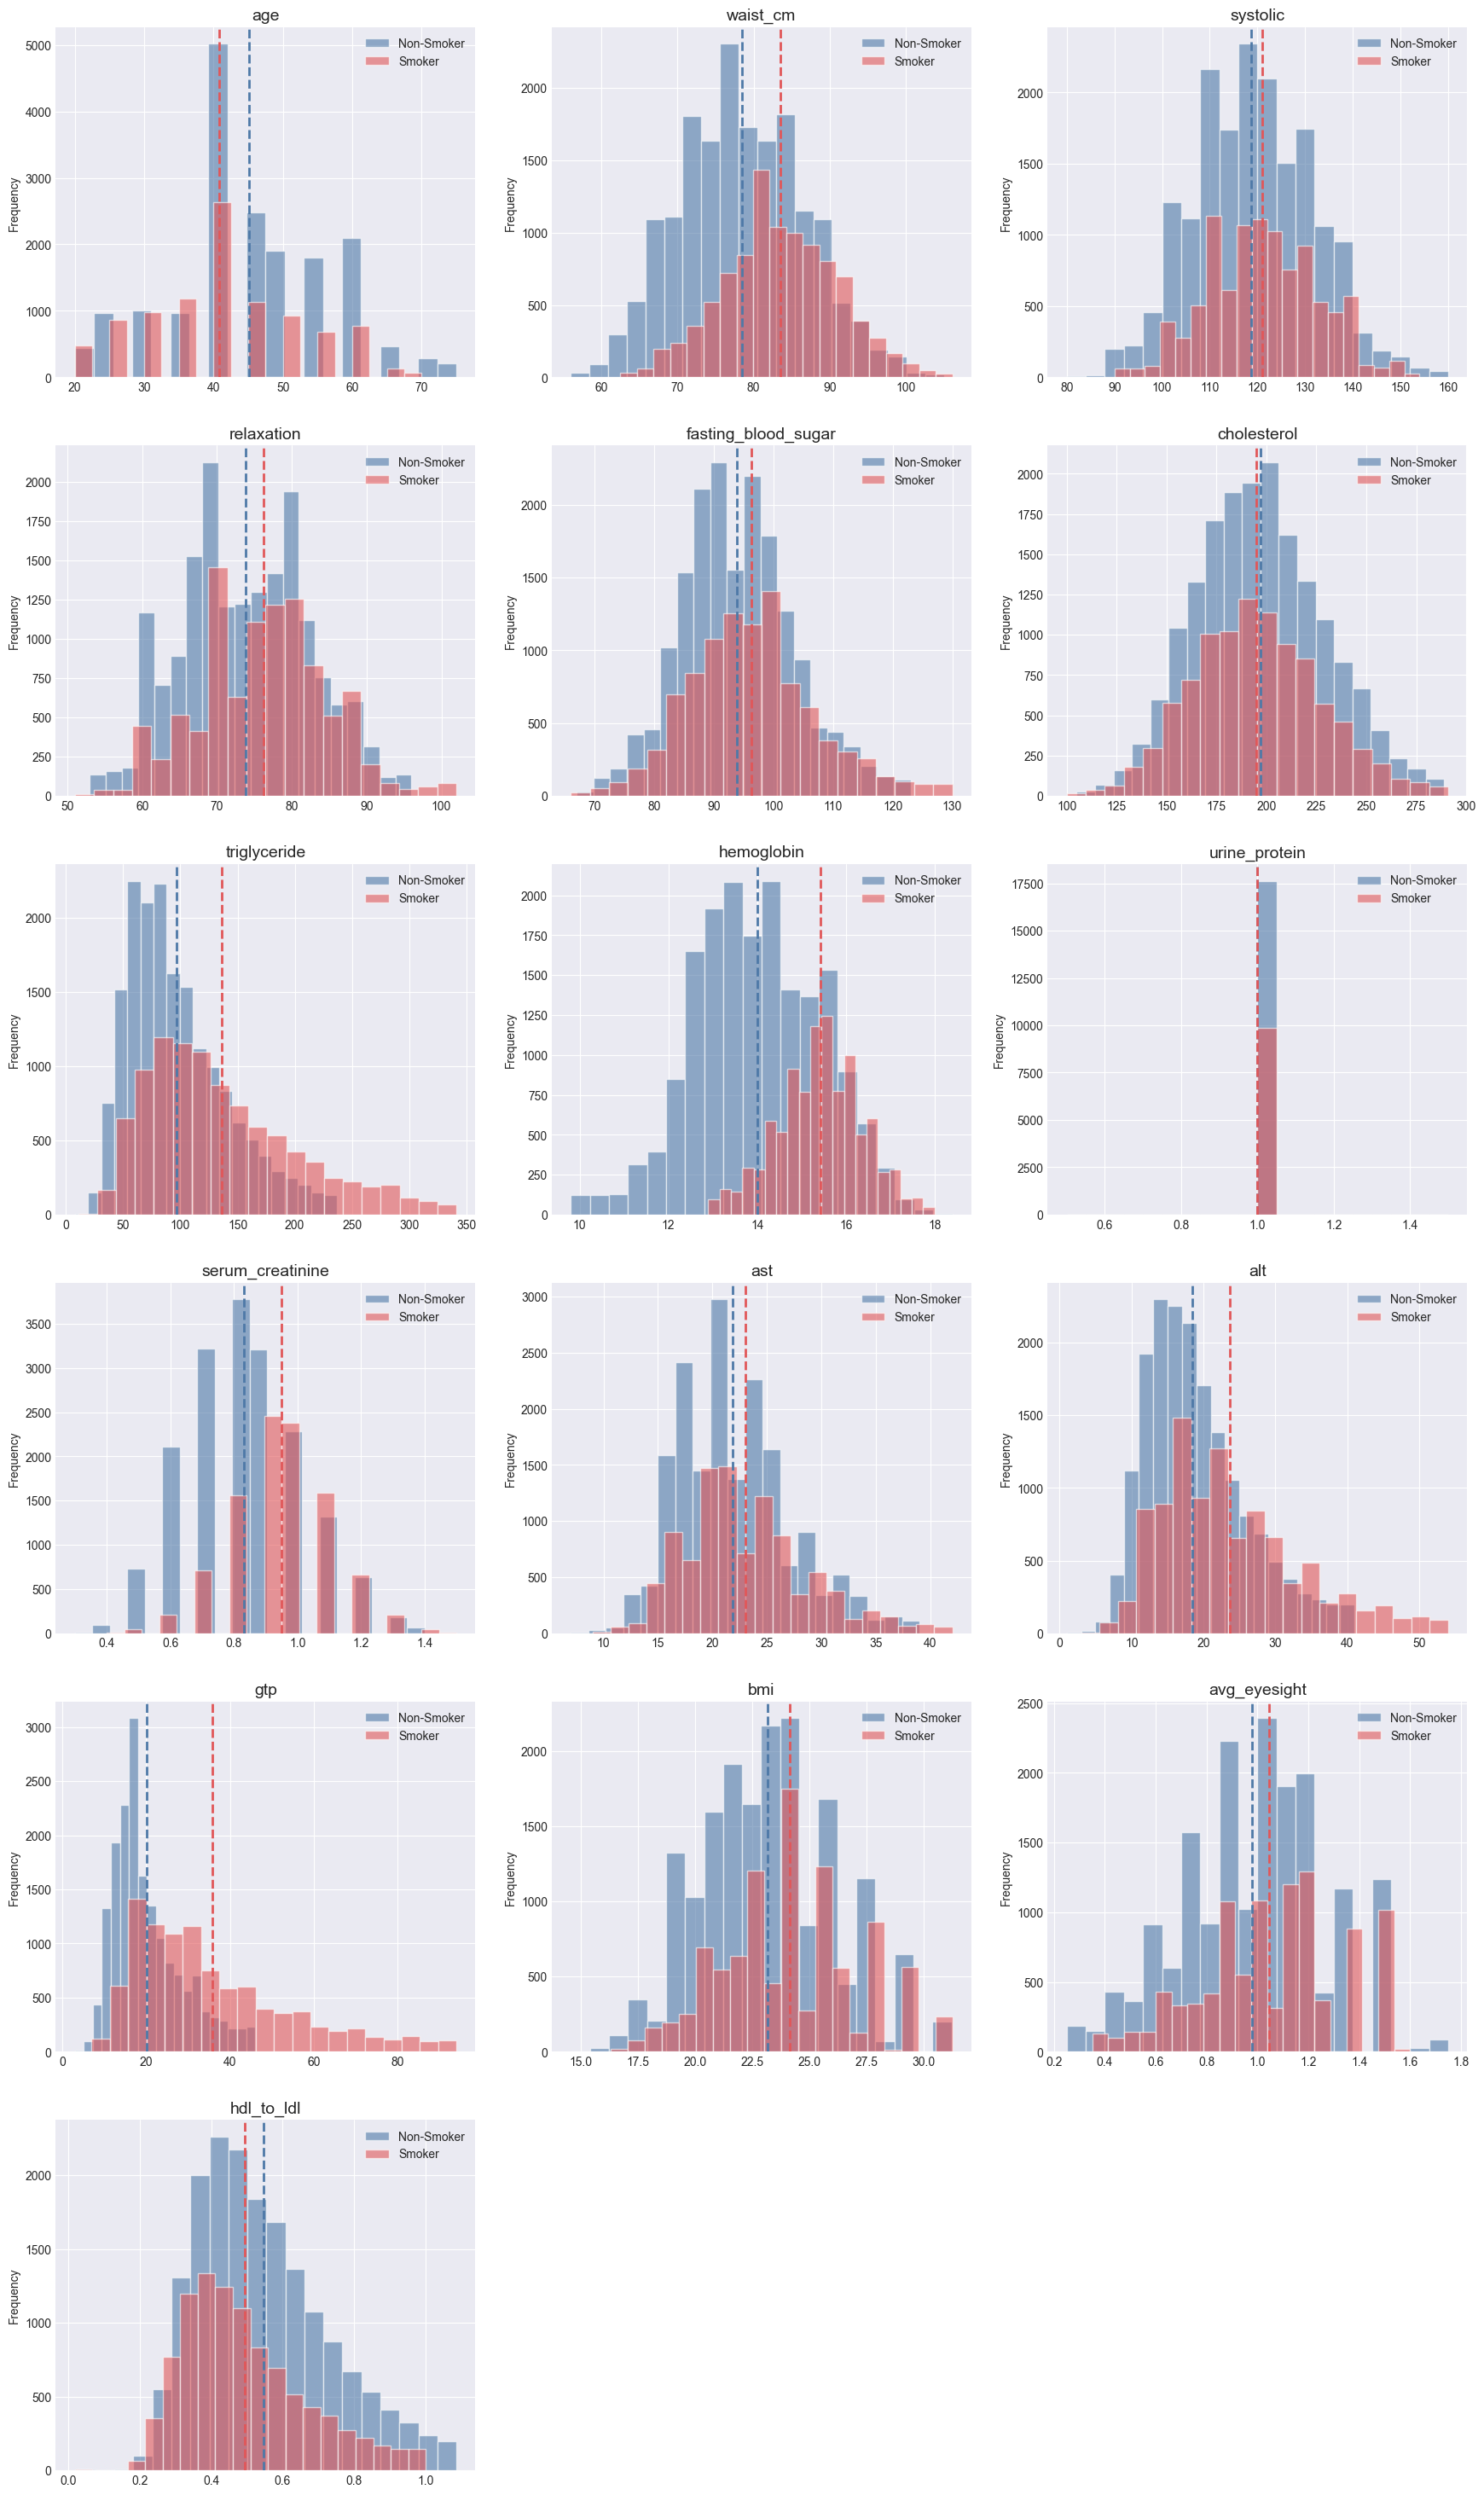

In [172]:
plot_comparison_histogram_style(numeric_cols, smoking_0_no_out,"Non-Smoker", smoking_1_no_out,"Smoker")

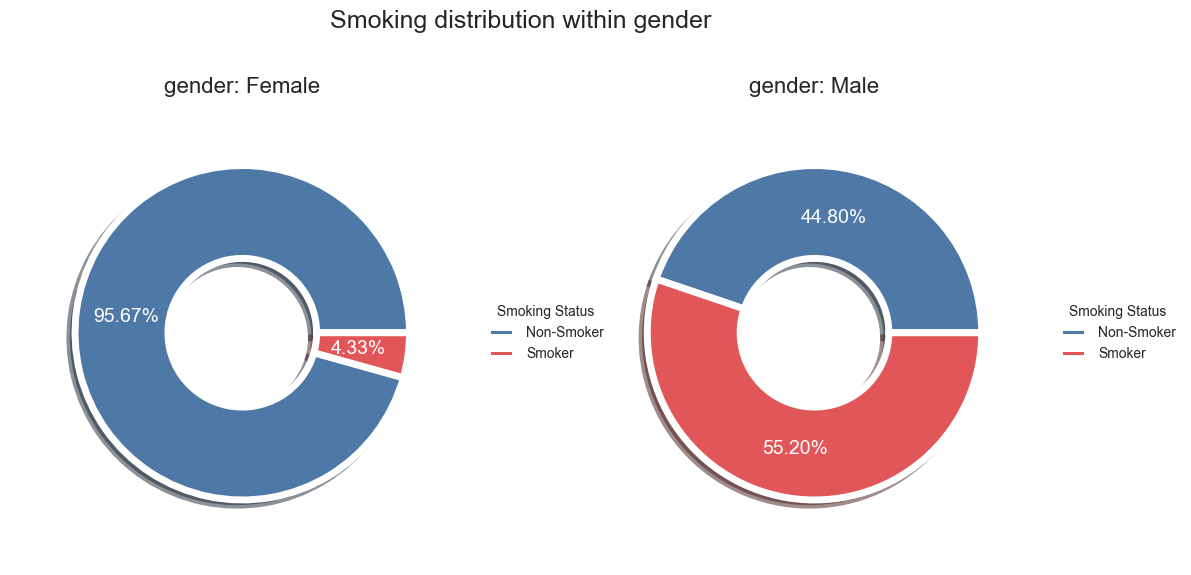

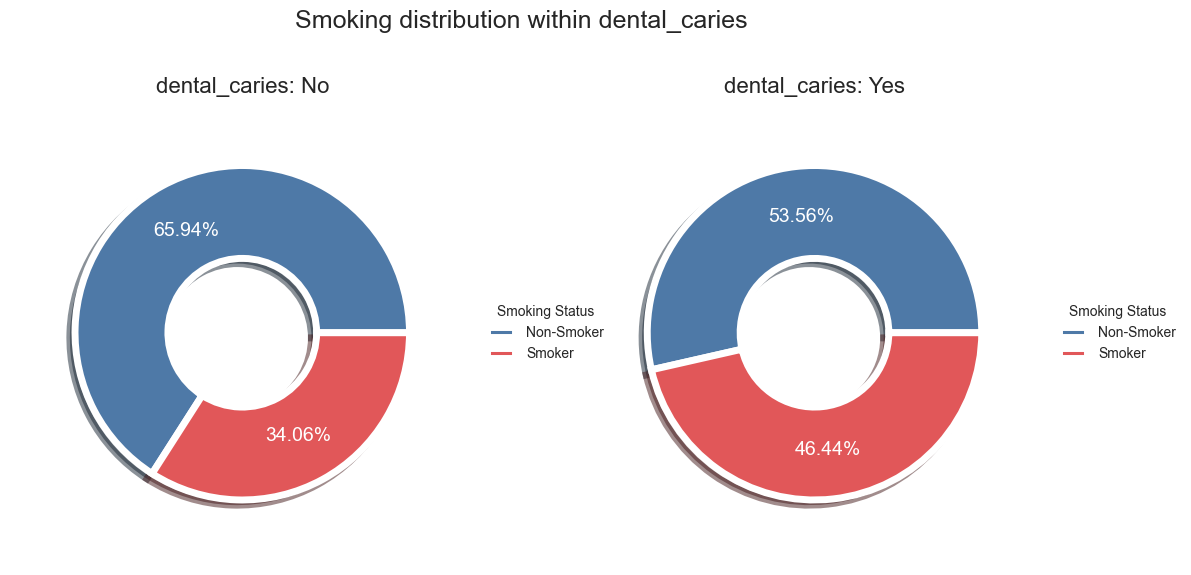

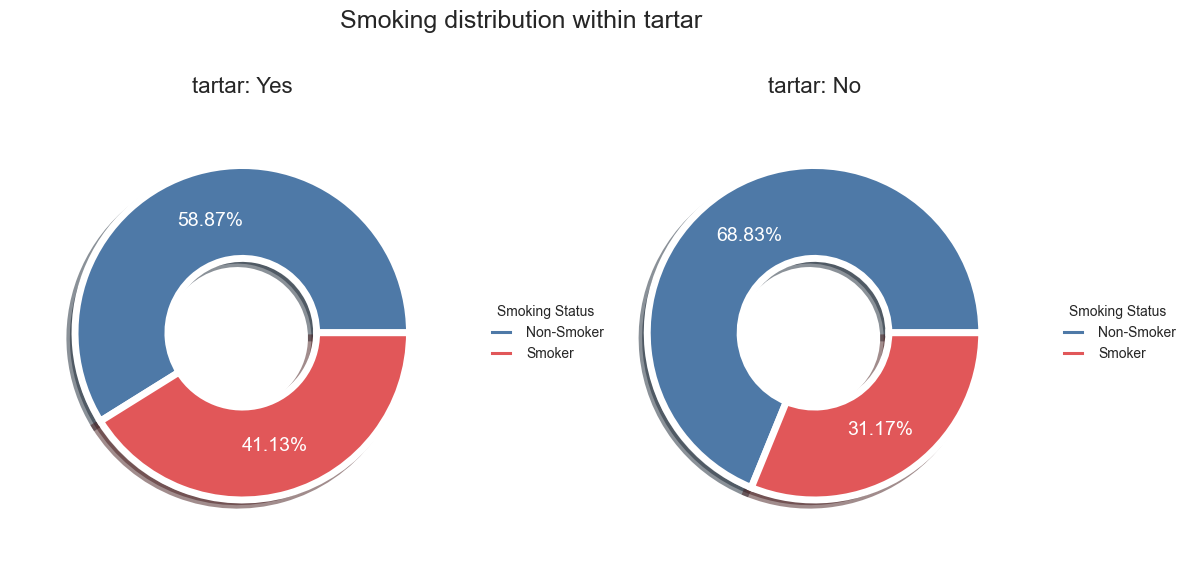

In [173]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ["smoking"]]

for col in categorical_cols:

    categories = df[col].dropna().unique()
    n_cat = len(categories)

    fig, axs = plt.subplots(1, n_cat, figsize=(6 * n_cat, 6))
    if n_cat == 1:
        axs = [axs]

    plt.tight_layout(pad=4.0)

    for i, category in enumerate(categories):
        ax = axs[i]

        subset = df[df[col] == category]

        counts = subset["smoking"].value_counts().reindex(["No", "Yes"], fill_value=0)

        labels = ["Non-Smoker", "Smoker"]
        colors = ["#4e79a7", "#e15759"]

        ax.pie(
            counts.values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=0,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(color="white", size=14),
            wedgeprops=dict(width=0.5, edgecolor="white", linewidth=5)
        )

        ax.set_title(f"{col}: {category}", fontsize=16)

        ax.legend(
            labels,
            title="Smoking Status",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    plt.suptitle(
        f"Smoking distribution within {col}",
        fontsize=18,
        y=1.05
    )

    plt.show()


**Smoking-Male-Based Analysis (Male Non-Smoker vs Male Smoker)**

In [175]:
smoking_male = smoking_1[smoking_1["gender"] == "Male"]
no_smoking_male = smoking_0[smoking_0["gender"] == "Male"]

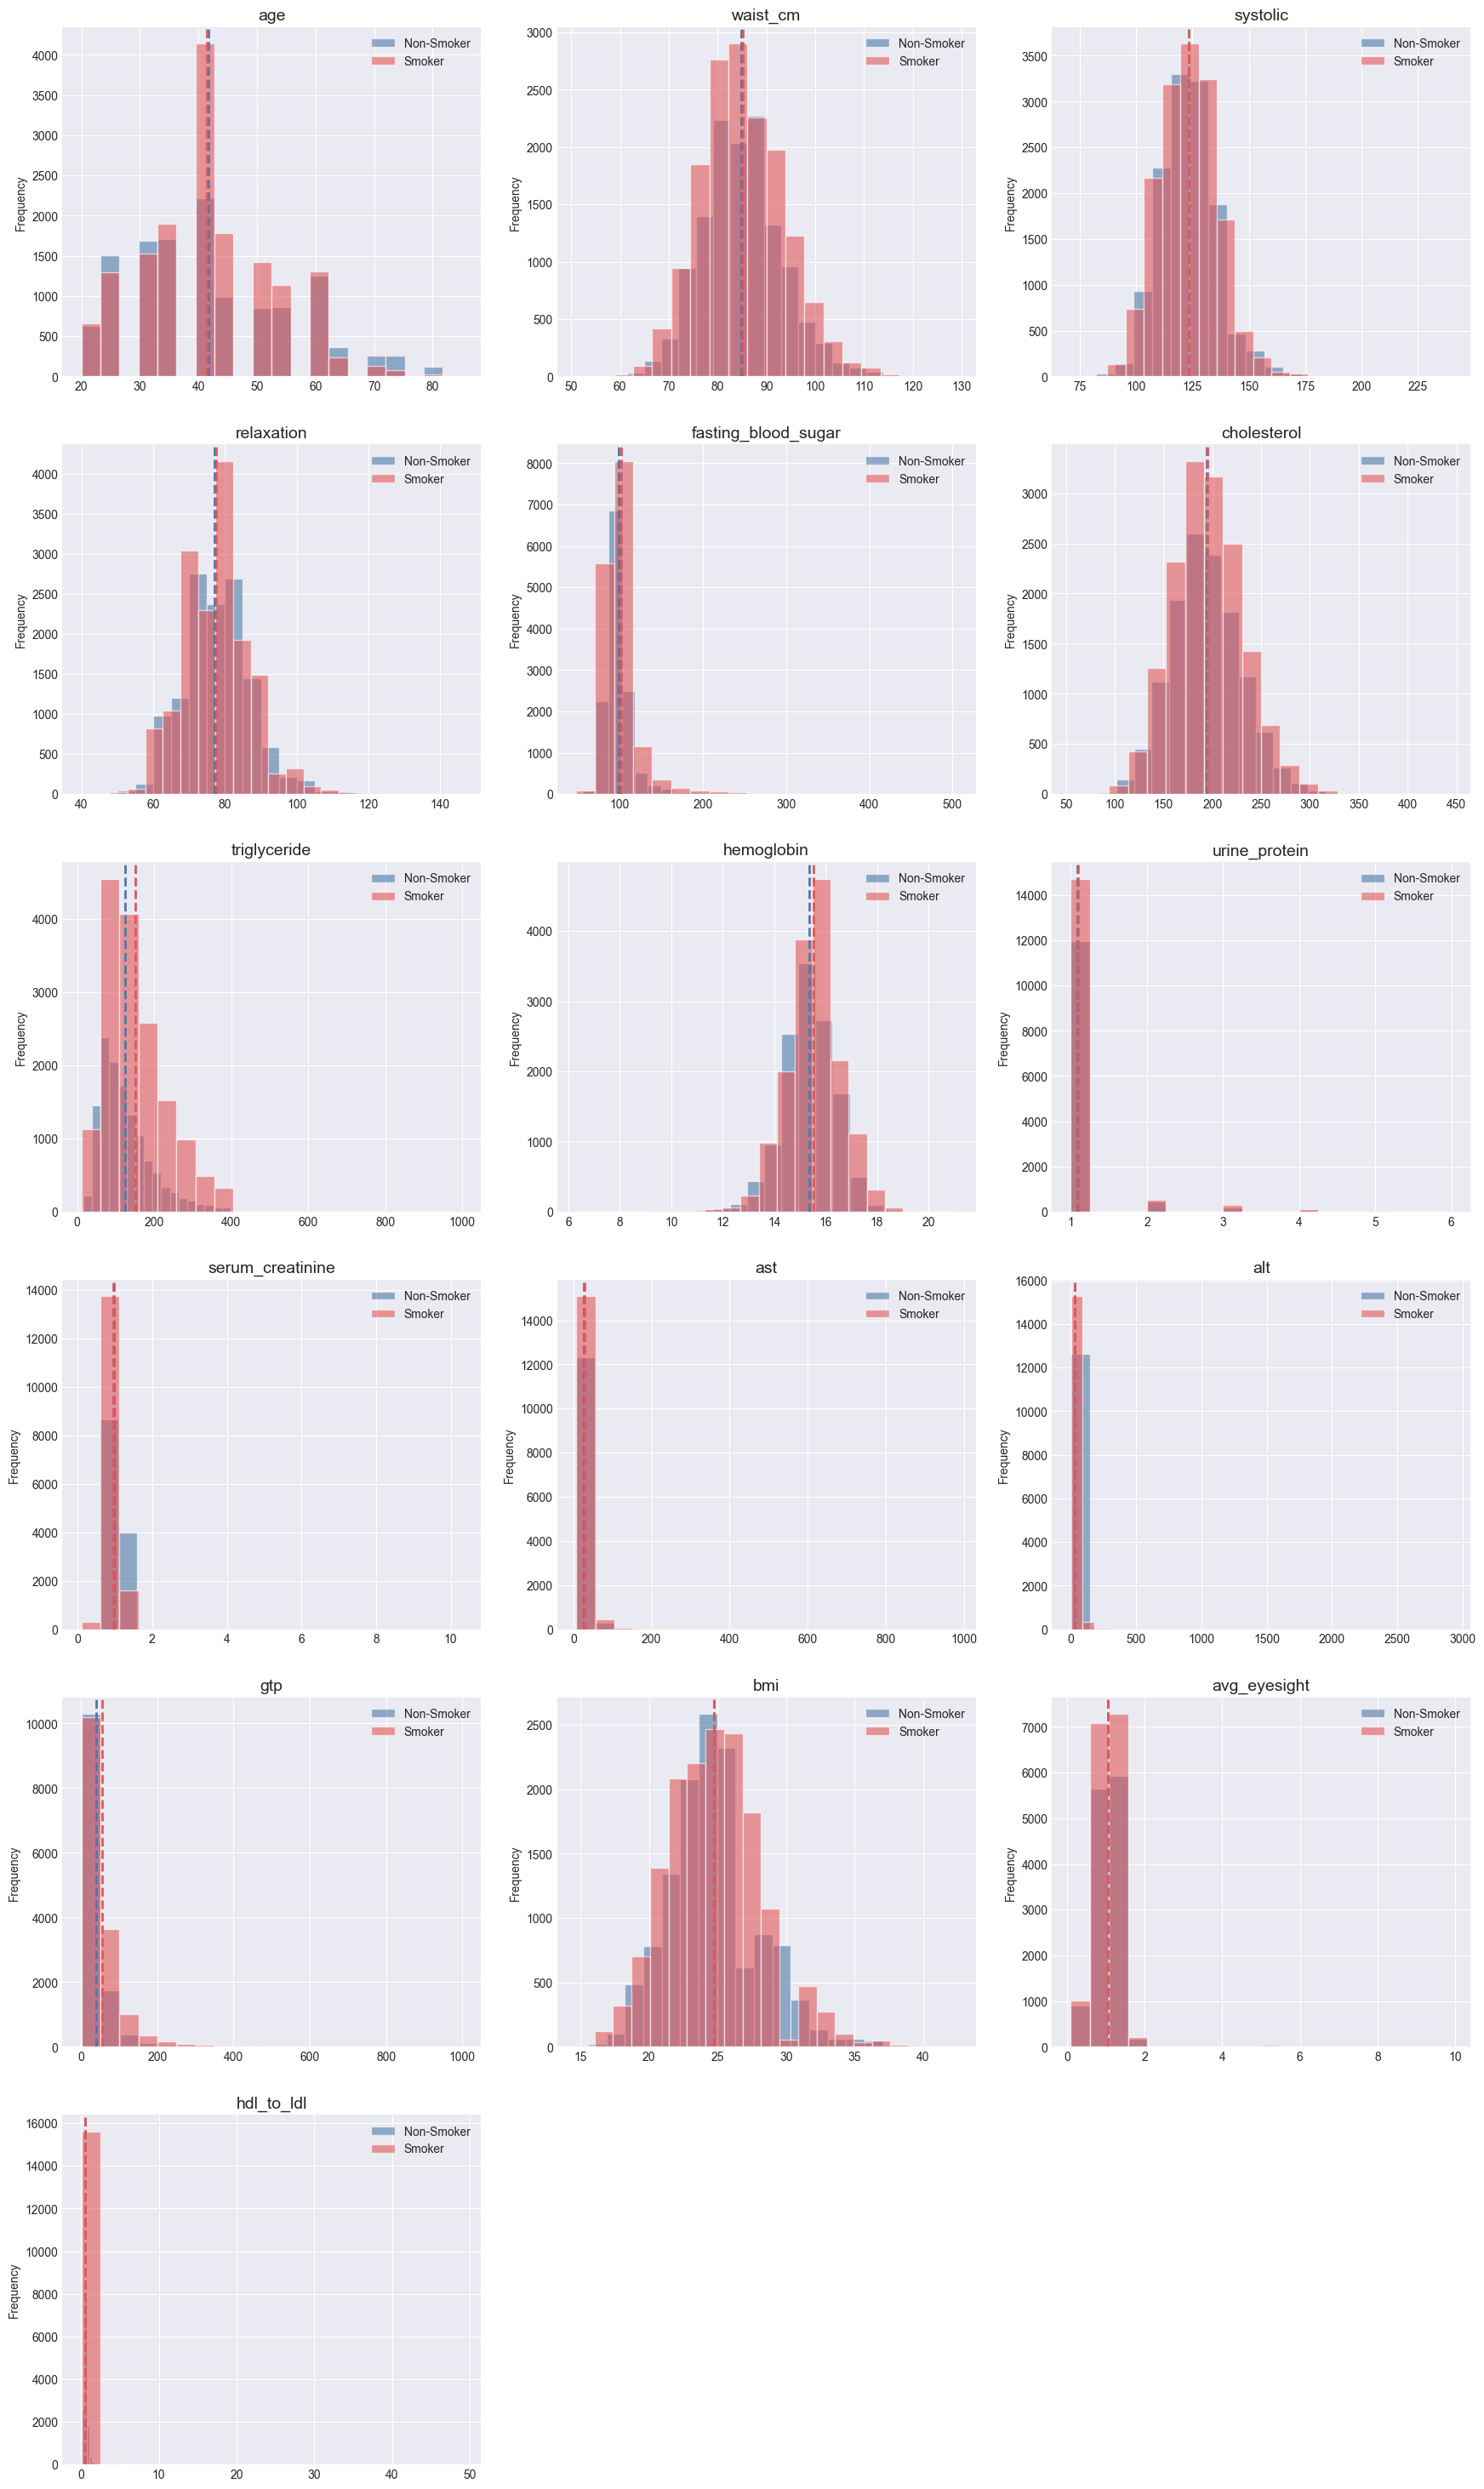

In [176]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Non-Smoker",smoking_male,"Smoker")

In [185]:
smoking_male_ou = remove_outliers_iqr(smoking_male,numeric_cols)
no_smoking_male_ou = remove_outliers_iqr(no_smoking_male,numeric_cols)

Original shapes:

(15650, 20)
Without outliers:

(9403, 20)
Original shapes:

(8293, 20)
Without outliers:

(6772, 20)


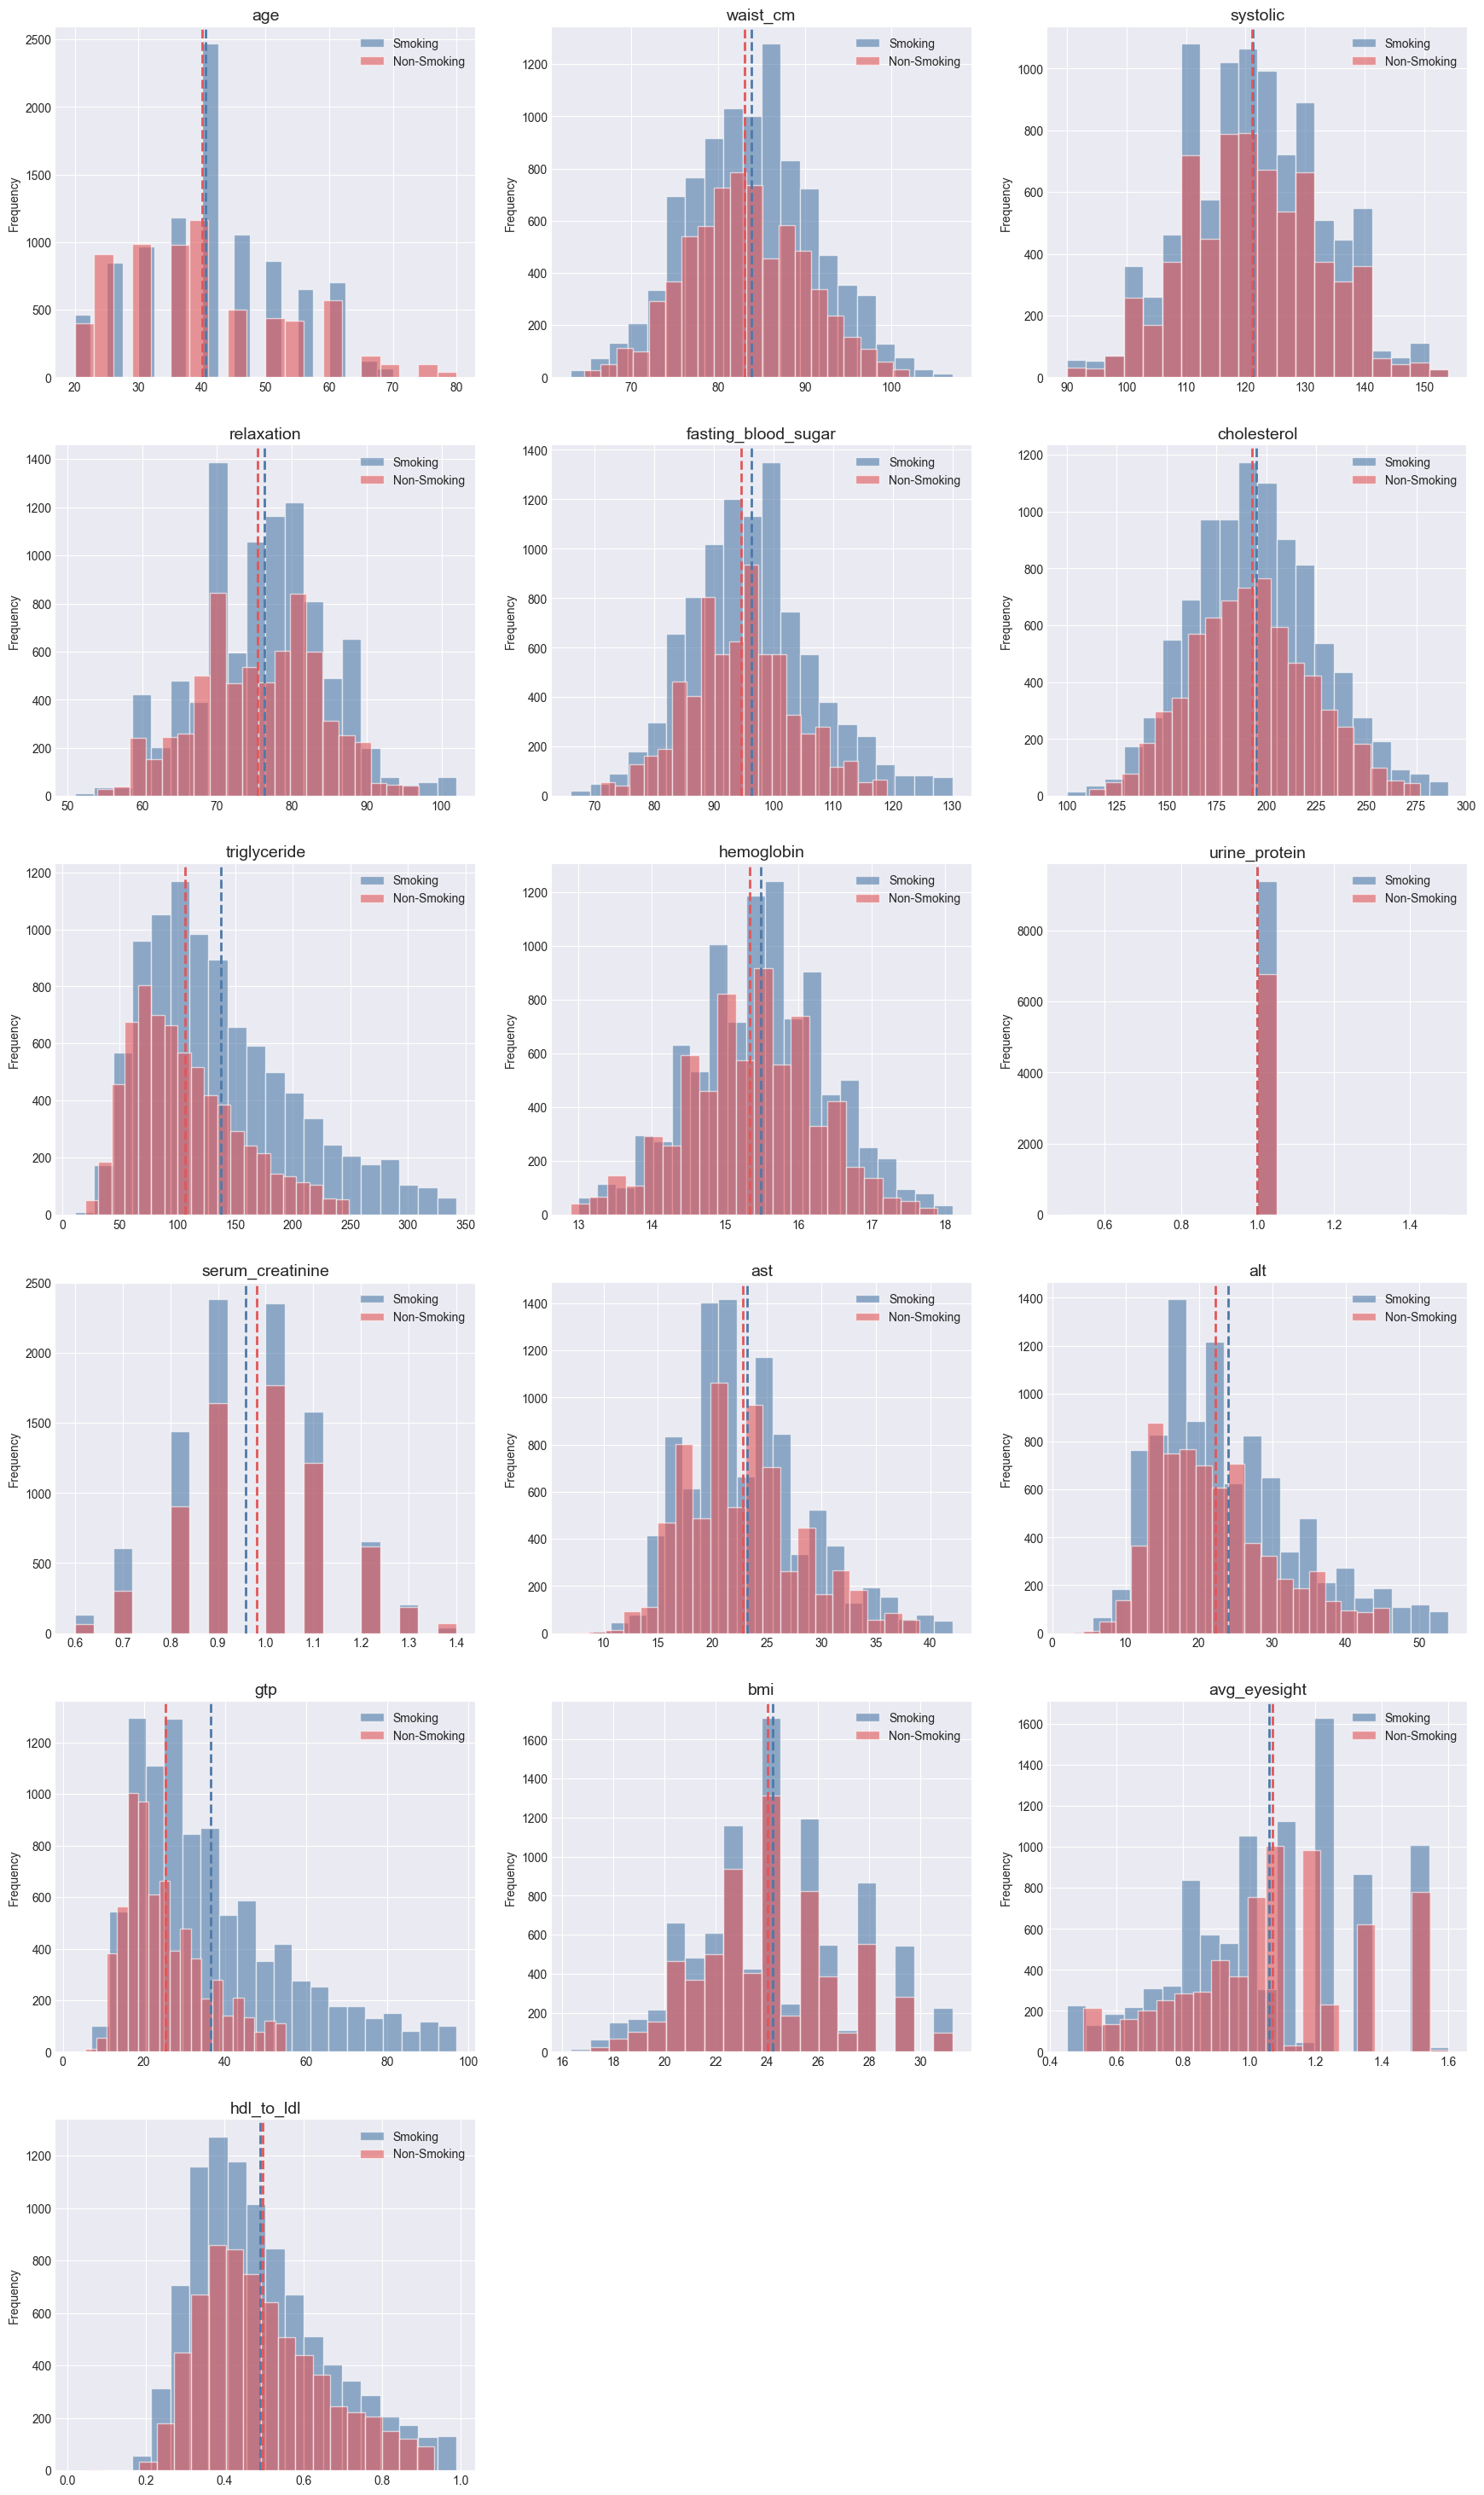

In [186]:
plot_comparison_histogram_style(numeric_cols,smoking_male_ou,"Smoking",no_smoking_male_ou,"Non-Smoking")

**Gender-Based Analysis (Male vs Female)**

In [177]:
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

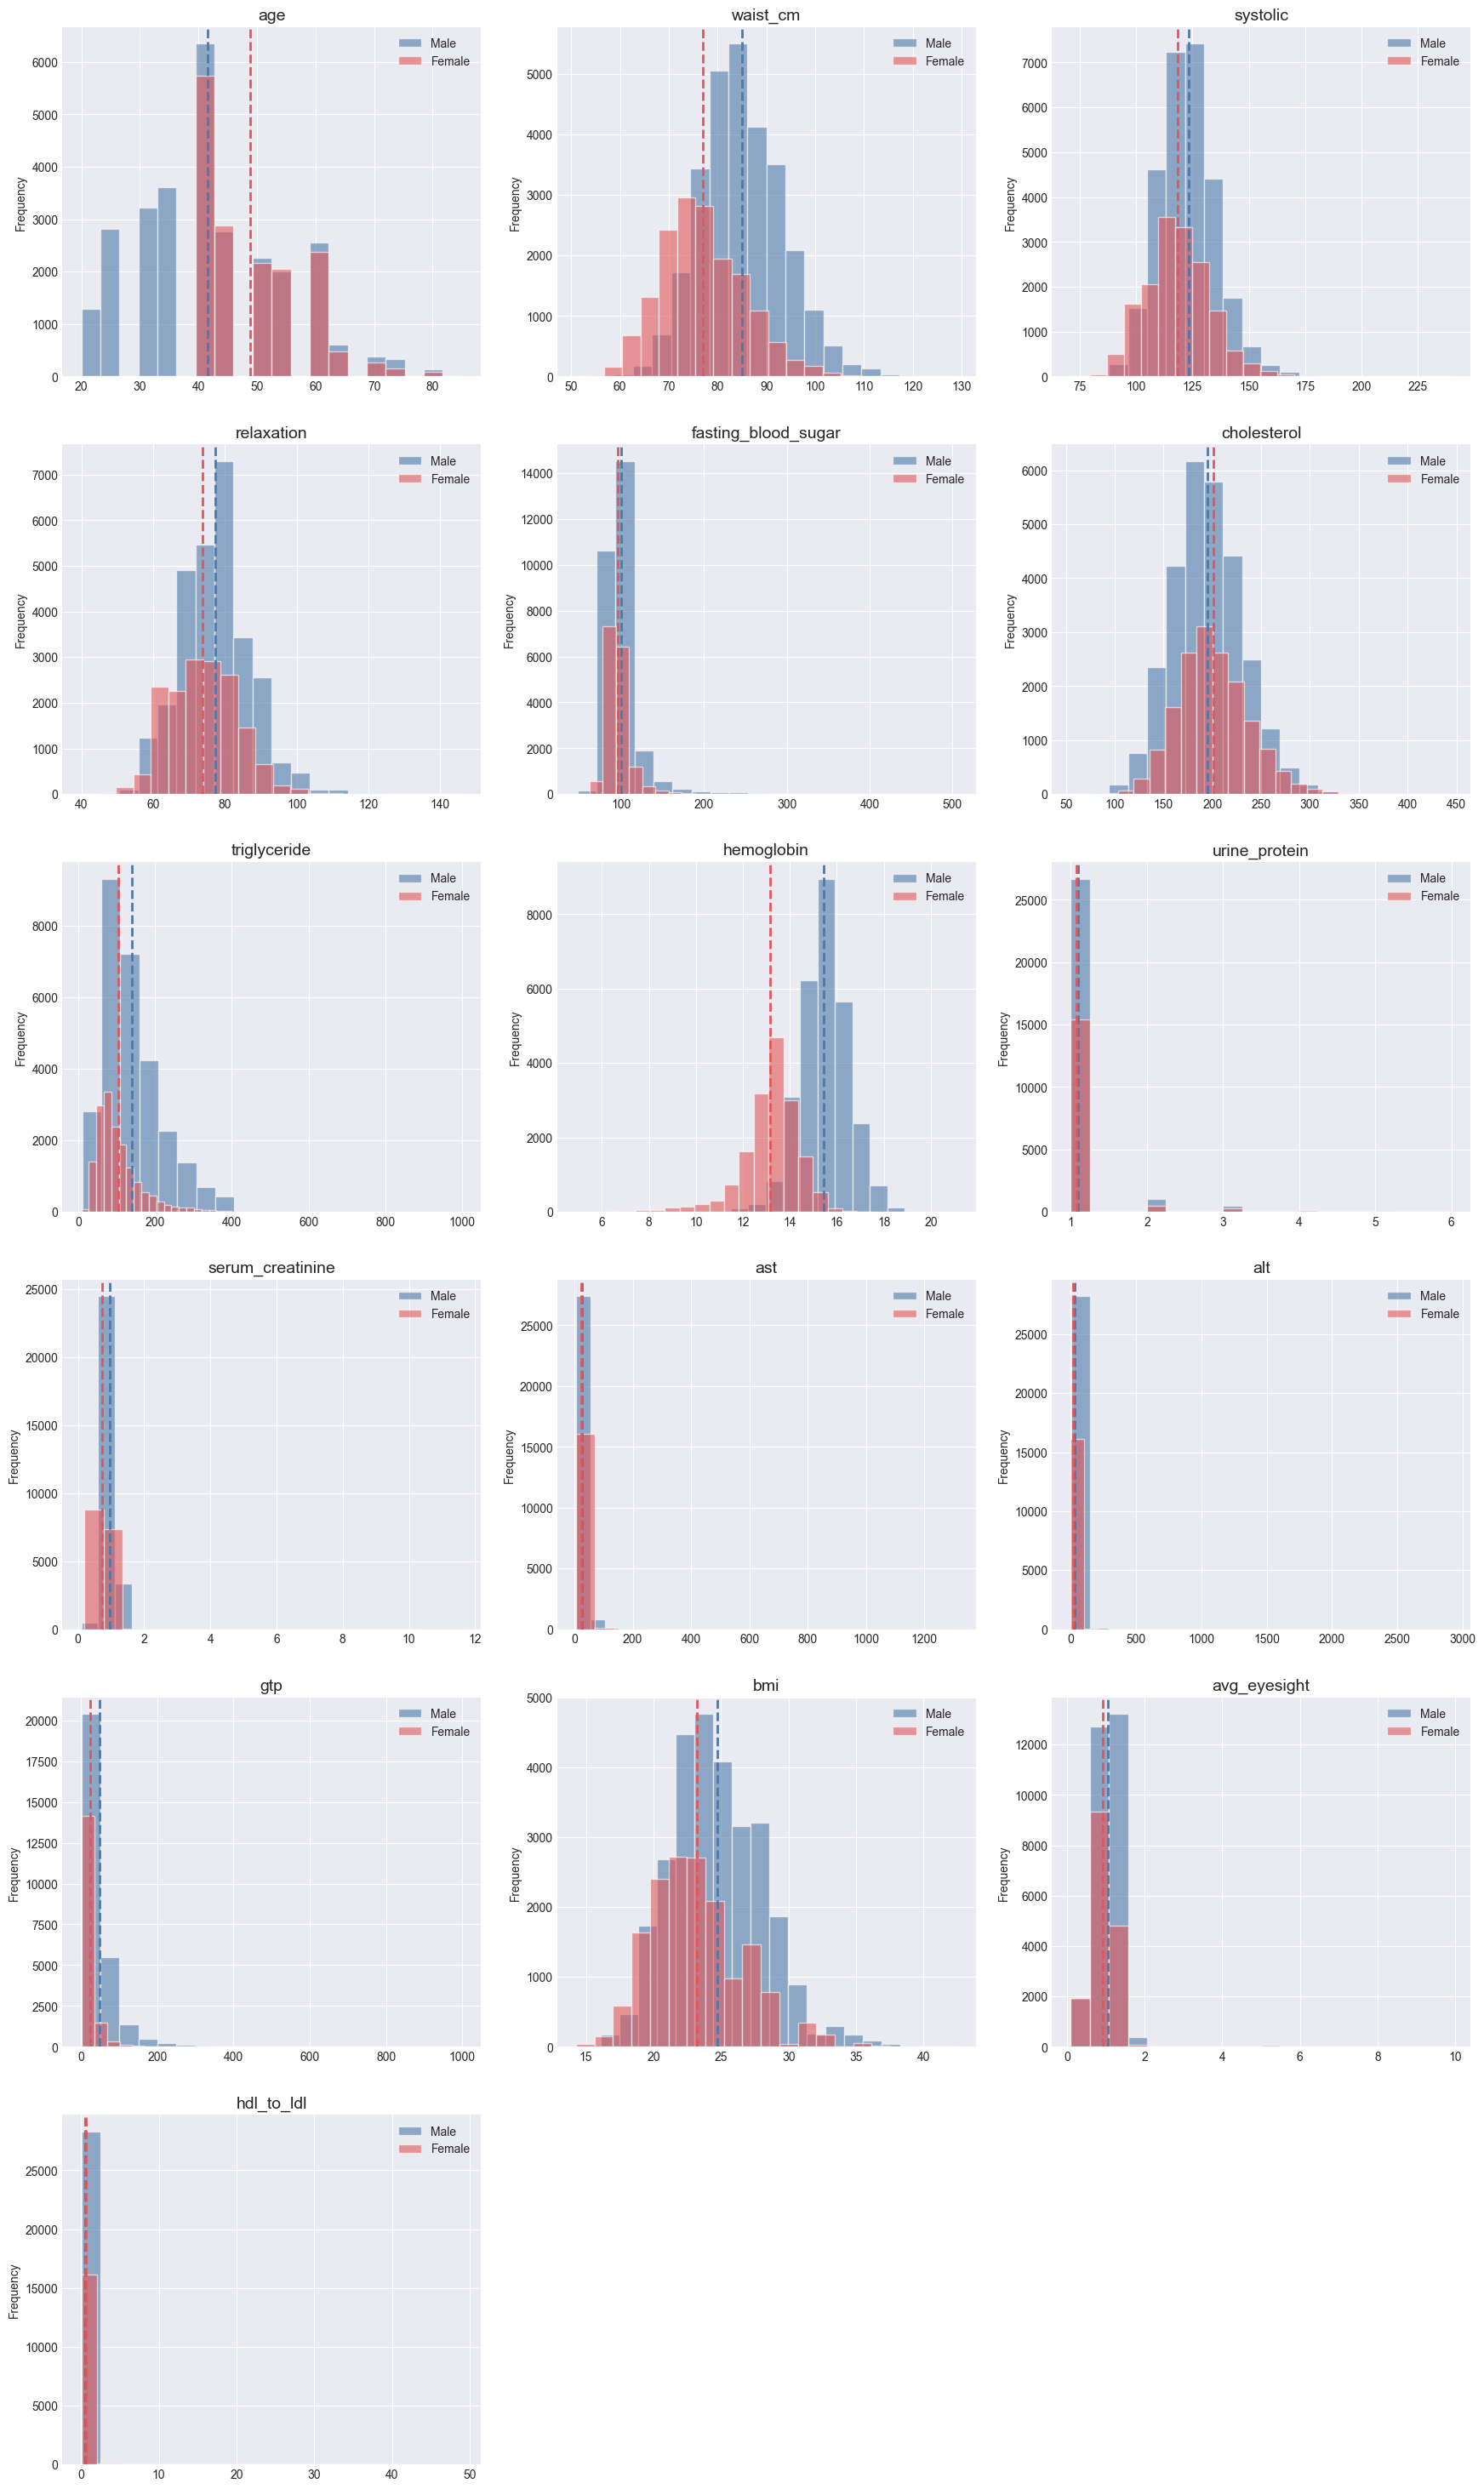

In [178]:
plot_comparison_histogram_style(numeric_cols,male,"Male",female,"Female")

In [180]:
male_ou = remove_outliers_iqr(male,numeric_cols) 
female_ou = remove_outliers_iqr(female,numeric_cols)

Original shapes:

(28349, 20)
Without outliers:

(17208, 20)
Original shapes:

(16203, 20)
Without outliers:

(9968, 20)


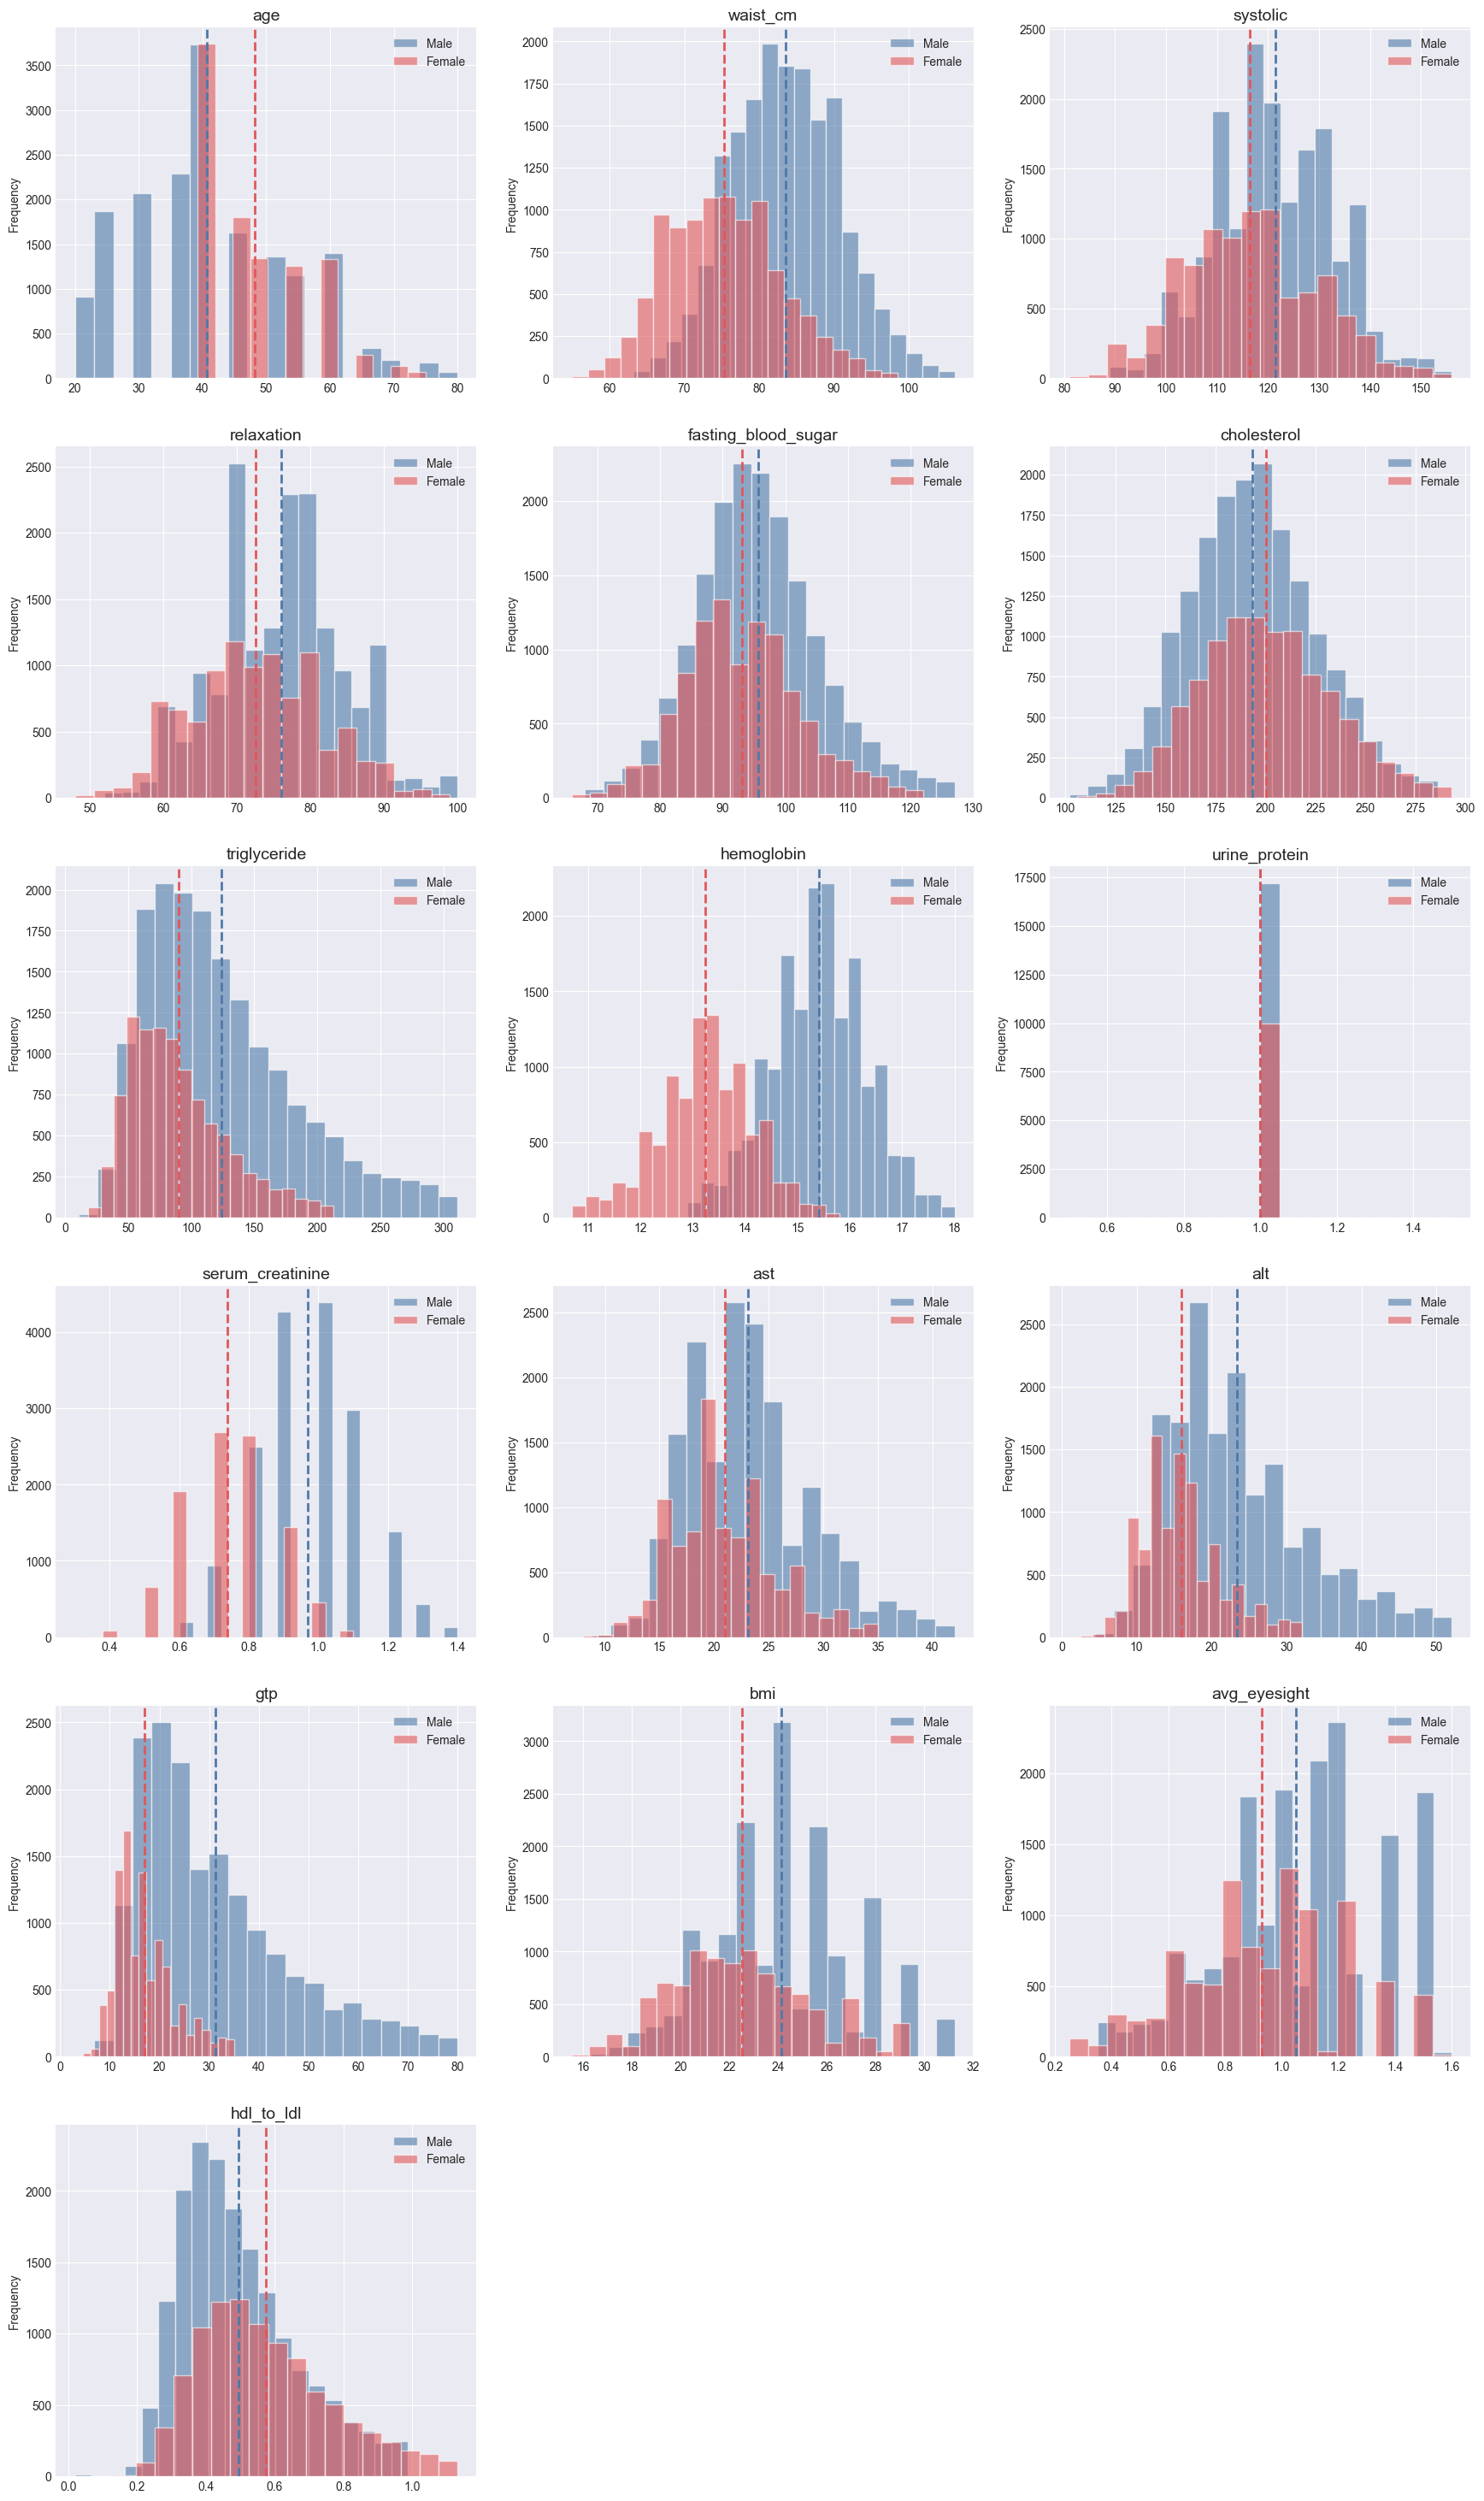

In [181]:
plot_comparison_histogram_style(numeric_cols,male_ou,"Male",female_ou,"Female")

**Non-Smoker-Gender-Based Analysis (Male Non-Smoker vs Female Non-Smoker)**

In [182]:
no_smoking_male = male_ou[male_ou["smoking"] == "No"]
no_smoking_female = female_ou[female_ou["smoking"] == "No"]

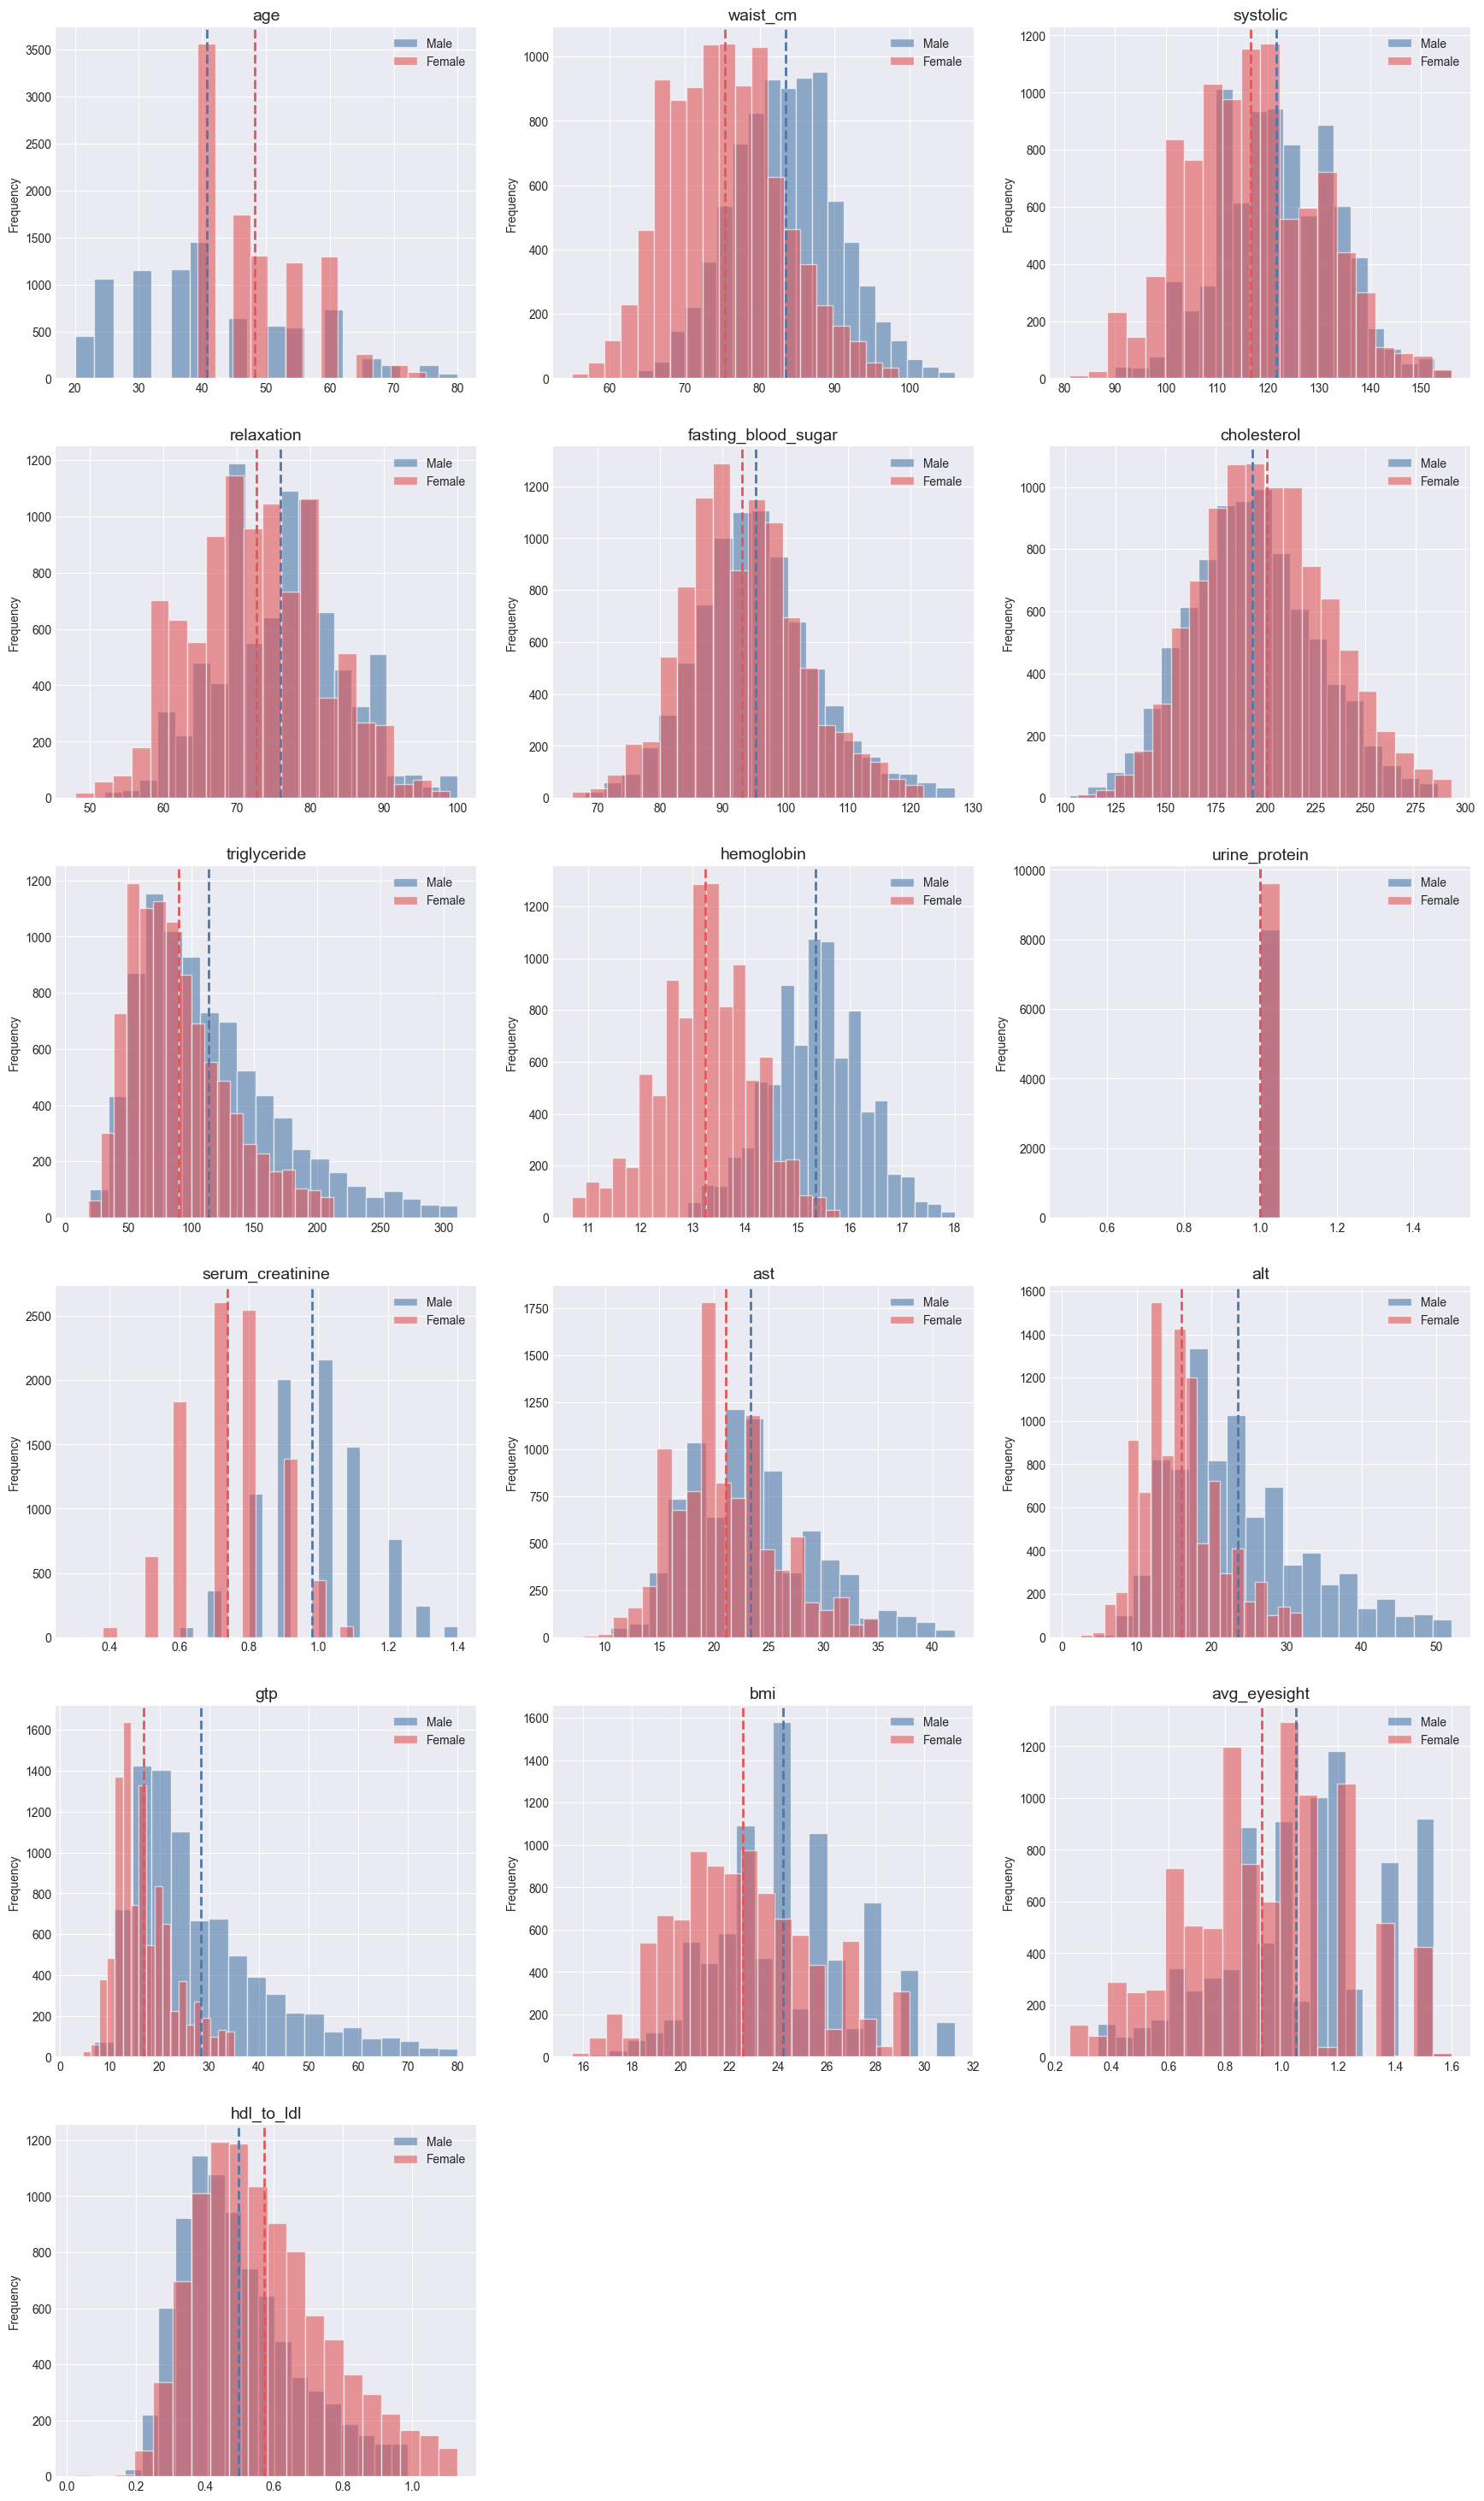

In [183]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Male",no_smoking_female,"Female")

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dimensionality Reduction
</p>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preprocessing For Classification
</p>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Classification Models
</p>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Final Evaluation and Insights
</p>

<a id="1"></a>

<p style="
    padding:12px;
    background-color:#ffffff;
    margin:0;
    color:#000000;
    font-family:serif;
    font-size:200%;
    text-align:center;
    border-radius: 15px 50px;
    overflow:hidden;
    font-weight:600;
    border: 2px solid #000000;
">
    Thank You
</p>

<br>

### Contact Information

**Name:** Jerónimo Hoyos Botero

**Connect on LinkedIn:** https://www.linkedin.com/in/yourprofile 
 
**Explore Github:** https://github.com/yourusername  

---

### References

- https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets
- https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification#6-%7C-DATASET-PREPROCESSING
- https://www.kaggle.com/code/bugraorhan/how-your-body-reacts-to-smoking#📊-Step-3:-Exploratory-Data-Analysis-(EDA)
- https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4